# TensorFlow : Classificação de Frutas

## Introdução

No presente projeto, será realizada a classificação de imagens de diferentes classes de frutas utilizando a biblioteca TensorFlow. O processo será dividido em várias etapas fundamentais, incluindo o pré-processamento dos dados, a exploração das funcionalidades do TensorFlow, a construção de modelos de aprendizado de máquina, a avaliação dos modelos através de diferentes métricas e, finalmente, a predição das imagens. A classificação automática de imagens de frutas é um problema relevante em diversas áreas, como agricultura, comércio e alimentação. Identificar corretamente as frutas pode otimizar processos de colheita, controle de qualidade e distribuição. No entanto, essa tarefa pode ser desafiadora devido à variabilidade nas formas, cores e texturas das frutas, bem como às condições de iluminação e fundo das imagens capturadas.

link do dataset no [kaggle](https://www.kaggle.com/datasets/sshikamaru/fruit-recognition)

O conjunto de dados de **imagens** é composto pelas seguintes **classes**:

* **Apple Braeburn**: Uma variedade de maçã conhecida por sua pele vermelha e verde e sabor doce e picante.
* **Apple Granny Smith**: Uma variedade de maçã com pele verde brilhante e sabor ácido.
* **Apricot (Damasco)**: Fruto pequeno e redondo com pele aveludada e polpa laranja, doce e ligeiramente ácido.
* **Avocado (Abacate)**: Fruto com casca verde ou marrom, polpa cremosa e caroço grande central.
* **Banana**: Fruto longo e curvo com casca amarela quando maduro e polpa doce e macia.
* **Blueberry (Mirtilo)**: Pequenas bagas azuis-pretas, doces e suculentas.
* **Cactus fruit (Figo-da-Índia)**: Fruto de cactos, com casca espinhosa e polpa colorida (vermelha, laranja ou amarela) e sabor doce.
* **Cantaloupe (Melão Cantalupo)**: Melão com casca áspera e polpa laranja, doce e aromática.
* **Cherry (Cereja)**: Pequeno fruto redondo com pele vermelha, roxa ou preta e sabor doce ou ácido.
* **Clementine**: Pequena fruta cítrica, fácil de descascar, com sabor doce e menos ácido que a laranja.
* **Corn (Milho)**: Grãos amarelos ou brancos agrupados em uma espiga coberta por folhas verdes.
* **Cucumber Ripe (Pepino Maduro)**: Legume alongado com casca verde e polpa crocante e aquosa.
* **Grape Blue (Uva Azul)**: Pequenas bagas redondas de cor azul ou preta, doces e suculentas.
* **Kiwi**: Fruto pequeno e oval com casca marrom peluda e polpa verde ou dourada, com pequenas sementes pretas.
* **Lemon (Limão)**: Fruto cítrico de casca amarela e polpa ácida e suculenta.
* **Limes (Limas)**: Fruto cítrico menor que o limão, com casca verde e polpa ácida.
* **Mango (Manga)**: Fruto tropical grande com casca variando do verde ao vermelho e polpa laranja, doce e suculenta.
* **Onion White (Cebola Branca)**: Bulbo comestível com casca branca e sabor suave.
* **Orange (Laranja)**: Fruta cítrica com casca alaranjada e polpa doce e suculenta.
* **Papaya (Mamão)**: Fruto grande com casca verde-amarela e polpa laranja, doce e macia, contendo sementes pretas.
* **Passion Fruit (Maracujá)**: Fruto com casca roxa ou amarela e polpa aromática, azeda e cheia de sementes.
* **Peach (Pêssego)**: Fruto com casca aveludada, amarela ou rosada, e polpa doce e suculenta.
* **Pear (Pera)**: Fruto com formato variado, casca verde, amarela ou marrom e polpa doce e granulosa.
* **Pepper Green (Pimentão Verde)**: Legume grande com casca verde brilhante e polpa crocante e ligeiramente doce.
* **Pepper Red (Pimentão Vermelho)**: Similar ao pimentão verde, mas com casca vermelha e sabor mais doce.
* **Pineapple (Abacaxi)**: Fruto tropical grande com casca dura e espinhosa e polpa amarelo-dourada, doce e suculenta.
* **Plum (Ameixa)**: Pequeno fruto redondo com casca e polpa variando do amarelo ao roxo, com sabor doce ou ácido.
* **Pomegranate (Romã)**: Fruto com casca grossa e vermelha, contendo numerosas sementes suculentas e doces.
* **Potato Red (Batata Vermelha)**: Tubérculo com casca vermelha e polpa branca, usada em diversas preparações culinárias.
* **Raspberry (Framboesa)**: Pequenas bagas vermelhas, doces e ligeiramente ácidas, formadas por vários pequenos drupas.
* **Strawberry (Morango)**: Fruto vermelho e suculento com sementes pequenas na superfície e sabor doce.
* **Tomato (Tomate)**: Fruto vermelho, suculento e versátil, amplamente utilizado em saladas, molhos e pratos quentes.
* **Watermelon (Melancia)**: Fruto grande com casca verde e polpa vermelha, doce e aquosa, com sementes pretas ou sem sementes.

## Pré-Processamento

Importações:

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
import hashlib
import pathlib
import matplotlib.image as mpimg



Será inserido abaixo:


> Adicionar aspas


* **username**":"lviabraga"
* **key**:"95e9c1fd8a41fdc6c5344463d11adba6"



In [ ]:
od.download(
	"https://www.kaggle.com/datasets/sshikamaru/fruit-recognition")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lviabraga
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition


100%|██████████| 102M/102M [00:01<00:00, 94.9MB/s]


Acima é feito o download do dataset do kaggle diretamente para esse notebook do google colab

Definindo o caminho do conjunto de dados.
Função os.walk(): para percorrer uma árvore de diretórios começando pelo caminho "../input/fruit-recognition".
O caminho do diretório atual é armazenado na variável dirpath, a lista de nomes de subdiretórios é armazenada na variável dirnames, e a lista de nomes de arquivos é armazenada na variável filenames.

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/fruit-recognition"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in '/content/fruit-recognition'.
There are 1 directories and 0 images in '/content/fruit-recognition/train'.
There are 33 directories and 0 images in '/content/fruit-recognition/train/train'.
There are 0 directories and 490 images in '/content/fruit-recognition/train/train/Limes'.
There are 0 directories and 492 images in '/content/fruit-recognition/train/train/Apple Granny Smith'.
There are 0 directories and 492 images in '/content/fruit-recognition/train/train/Lemon'.
There are 0 directories and 492 images in '/content/fruit-recognition/train/train/Peach'.
There are 0 directories and 479 images in '/content/fruit-recognition/train/train/Orange'.
There are 0 directories and 447 images in '/content/fruit-recognition/train/train/Plum'.
There are 0 directories and 492 images in '/content/fruit-recognition/train/train/Apricot'.
There are 0 directories and 492 images in '/content/fruit-recognition/train/train/Strawberry'.
There are 0 directories and 490

### Verificando valores nulos e Duplicatas:

In [ ]:
def check_for_null_images(directory):
    null_images = []
    for filename in os.listdir(directory):
        # Verifique se o arquivo é uma imagem (você pode ajustar os formatos de imagem conforme necessário)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            # Tente carregar a imagem
            try:
                img = cv2.imread(filepath)
                # Verifique se a imagem é nula (todos os pixels são pretos)
                if img is None or img.sum() == 0:
                    null_images.append(filepath)
            except Exception as e:
                print(f"Erro ao processar {filepath}: {e}")
    return null_images

# Diretório de treinamento
train_dir = "../content/fruit-recognition/train/train/"
null_images_train = check_for_null_images(train_dir)
if null_images_train:
    print("Imagens nulas encontradas no conjunto de treinamento:")
    for img_path in null_images_train:
        print(img_path)
else:
    print("Nenhuma imagem nula encontrada no conjunto de treinamento.")

# Diretório de teste
test_dir = "../content/fruit-recognition/test/test/"
null_images_test = check_for_null_images(test_dir)
if null_images_test:
    print("Imagens nulas encontradas no conjunto de teste:")
    for img_path in null_images_test:
        print(img_path)
else:
    print("Nenhuma imagem nula encontrada no conjunto de teste.")


Nenhuma imagem nula encontrada no conjunto de treinamento.
Nenhuma imagem nula encontrada no conjunto de teste.


In [ ]:
def generate_image_hash(image):
    """
    Função para gerar o hash de uma imagem.
    """
    # Redimensione a imagem para uma resolução fixa para garantir consistência no hash
    resized_image = cv2.resize(image, (8, 8))
    # Converta a imagem para escala de cinza
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # Calcule a média dos pixels
    mean_value = gray_image.mean()
    # Gere o hash com base na média dos pixels
    hash_value = ""
    for i in range(gray_image.shape[0]):
        for j in range(gray_image.shape[1]):
            if gray_image[i, j] > mean_value:
                hash_value += "1"
            else:
                hash_value += "0"
    return hash_value

def find_duplicate_images(directory):
    """
    Função para encontrar imagens duplicadas em um diretório.
    """
    image_hashes = {}
    duplicate_images = []

    for filename in os.listdir(directory):
        # Verifique se o arquivo é uma imagem (você pode ajustar os formatos de imagem conforme necessário)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filepath = os.path.join(directory, filename)
            # Tente carregar a imagem
            try:
                img = cv2.imread(filepath)
                # Gere o hash da imagem
                img_hash = generate_image_hash(img)
                # Verifique se já encontramos um hash idêntico
                if img_hash in image_hashes:
                    duplicate_images.append((filepath, image_hashes[img_hash]))
                else:
                    image_hashes[img_hash] = filepath
            except Exception as e:
                print(f"Erro ao processar {filepath}: {e}")

    return duplicate_images

# Diretório de treinamento
train_dir = "../content/fruit-recognition/train/train/"
duplicate_images_train = find_duplicate_images(train_dir)
if duplicate_images_train:
    print("Duplicatas encontradas no conjunto de treinamento:")
    for img_path1, img_path2 in duplicate_images_train:
        print(f"Duplicata 1: {img_path1}")
        print(f"Duplicata 2: {img_path2}")
else:
    print("Nenhuma duplicata encontrada no conjunto de treinamento.")

# Diretório de teste
test_dir = "../content/fruit-recognition/test/test/"
duplicate_images_test = find_duplicate_images(test_dir)
if duplicate_images_test:
    print("Duplicatas encontradas no conjunto de teste:")
    for img_path1, img_path2 in duplicate_images_test:
        print(f"Duplicata 1: {img_path1}")
        print(f"Duplicata 2: {img_path2}")
else:
    print("Nenhuma duplicata encontrada no conjunto de teste.")


Configurando o caminho para TREINO E TESTE:

In [ ]:
train_path = "../content/fruit-recognition/train/train/"
test_path = "../content/fruit-recognition/test/test/"

Obtendo os diferentes nomes de classes do diretório:

In [ ]:
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


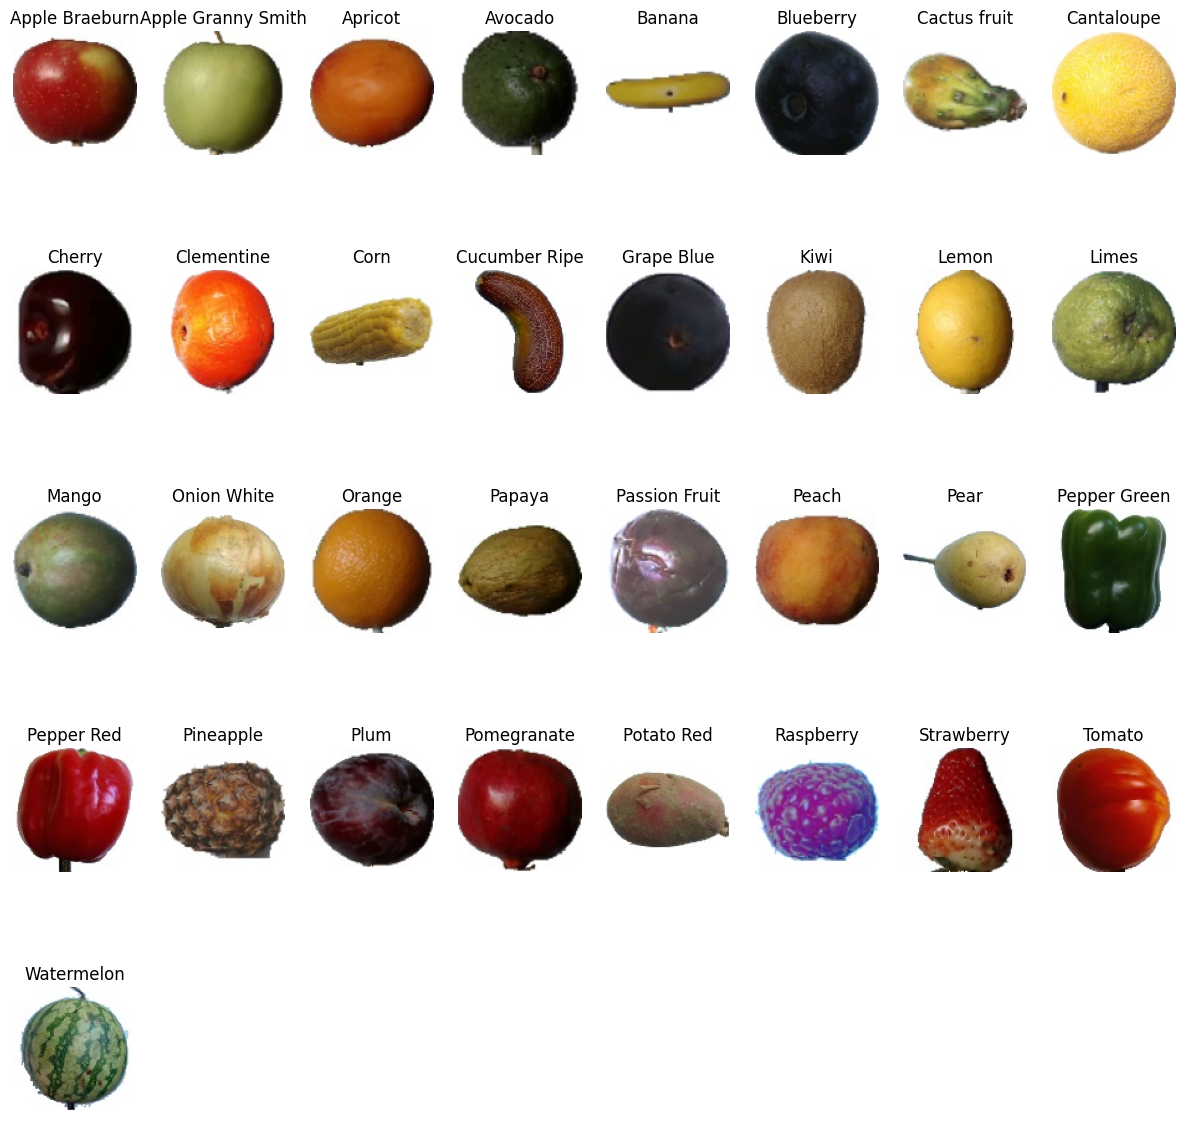

In [ ]:
# Trace uma grade de imagens de um conjunto de dados de treinamento
def view_random_image(target_dir, target_class):
  # Configure o diretório de destino (veremos as imagens daqui)
  target_folder = target_dir+target_class
  # Obtenha um caminho de imagem aleatório
  random_image = random.sample(os.listdir(target_folder), 100)
  # Leia a imagem e plote-a usando matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

#----------------------------------------------------------------------
plt.figure(figsize = (15,15))
# Veja uma imagem aleatória do conjunto de dados de treinamento para todas as classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

### Dataframe e Redução do tamanho do dataset

#### Treinamento(Validação):

* Preparando Dados de VALIDAÇÃO TREINAMENTO :
Coleta informações sobre o conjunto de dados de treinamento percorrendo a árvore de diretórios usando os.walk() e preenchendo um dicionário chamado train_val_data.

In [ ]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

Esse código em Python cria um DataFrame do pandas chamado train_val_data_df a partir dos dados contidos na variável train_val_data. Em seguida, ele utiliza o método sample() do DataFrame para amostrar uma fração dos dados, especificamente 88% (frac=0.88). O parâmetro random_state=42 define a semente aleatória para garantir a reprodutibilidade do processo de amostragem.

In [ ]:
train_val_data_df = pd.DataFrame(train_val_data)

train_val_data_df = train_val_data_df.sample(frac=0.88, random_state=42) # frac = 0.88

train_val_data_df.head()

path            filename  \
11507    ../content/fruit-recognition/train/train/Tomato      Tomato_202.jpg   
7895     ../content/fruit-recognition/train/train/Papaya      Papaya_333.jpg   
6264     ../content/fruit-recognition/train/train/Banana      Banana_324.jpg   
5456   ../content/fruit-recognition/train/train/Peppe...  Pepper Red_505.jpg   
9838       ../content/fruit-recognition/train/train/Corn        Corn_308.jpg   

            label  
11507      Tomato  
7895       Papaya  
6264       Banana  
5456   Pepper Red  
9838         Corn

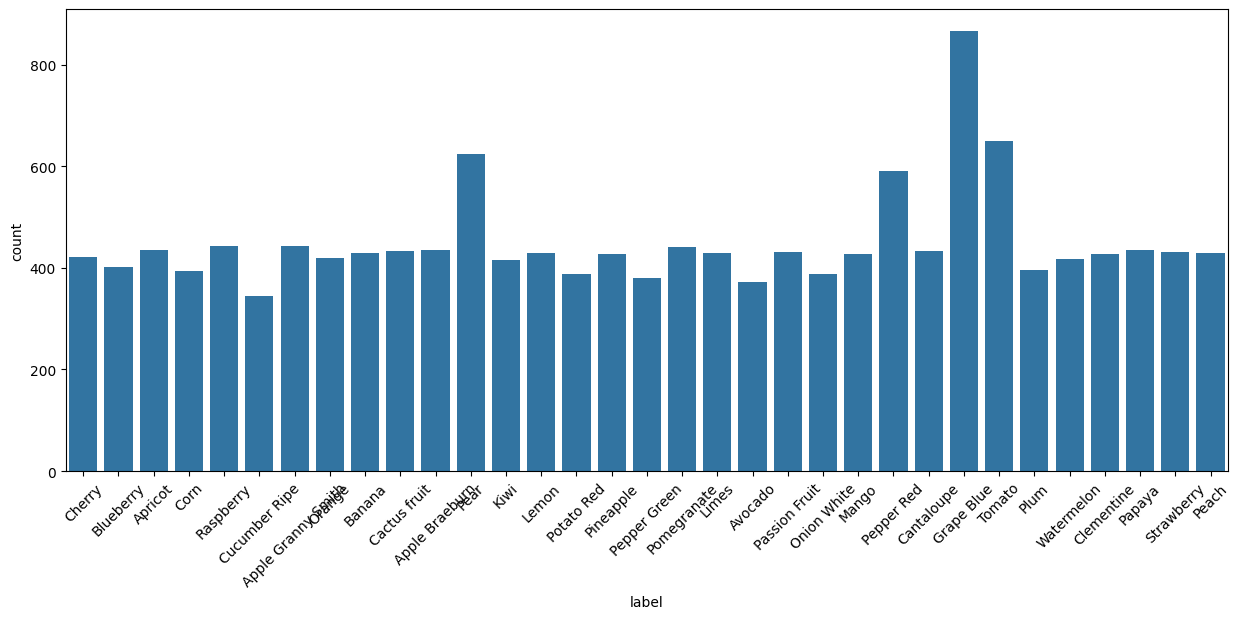

In [ ]:
plt.figure(figsize = (15,6))
#data_df['label'].value_counts().plot(kind='barh')
sns_cntplot = sns.countplot(x='label', data=train_val_data_df)
plt.xticks(rotation=45);

#### Teste:

* Preparando Dados de TESTE :
Coleta informações sobre o conjunto de dados de Teste percorrendo a árvore de diretórios usando os.walk() e preenchendo um dicionário chamado test_data.

Prepare os dados de teste, Leia os dados de teste e crie um dataframe:

In [ ]:
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

Este código cria um DataFrame pandas chamado test_data_df a partir dos dados contidos na variável test_data. Em seguida, ele utiliza o método sample() do DataFrame para amostrar uma fração dos dados, especificamente 88% (frac=0.88). O parâmetro random_state=42 define a semente aleatória para garantir a reprodutibilidade do processo de amostragem.

In [ ]:
test_data_df = pd.DataFrame(test_data)

test_data_df = test_data_df.sample(frac=0.88, random_state=42) #frac = 0.88

test_data_df.head()

path  filename
2124  ../content/fruit-recognition/test/test/  1954.jpg
1609  ../content/fruit-recognition/test/test/  3598.jpg
3493  ../content/fruit-recognition/test/test/  1606.jpg
4856  ../content/fruit-recognition/test/test/  4843.jpg
101   ../content/fruit-recognition/test/test/  0230.jpg

### Carregando imagens e criando um array de dados

#### Treinamento(Validação)

Este código carrega imagens de um diretório com base nos caminhos especificados em um DataFrame chamado train_val_data_df. Ele itera sobre cada linha desse DataFrame, onde cada linha representa um exemplo de treinamento ou validação.

Para cada linha, o código carrega a imagem do caminho especificado usando a função load_img() e converte-a em um array numpy usando a função img_to_array(). Essas imagens são então armazenadas na lista images. Além disso, as etiquetas correspondentes a cada imagem são armazenadas na lista label.

Após iterar sobre todos os exemplos de treinamento e validação, o código converte as listas images e label em arrays numpy usando np.array(). Em seguida, imprime a forma dos arrays resultantes, o que dá uma ideia do tamanho do conjunto de dados.

In [ ]:
images = []
label = []
for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

#---------------------------------------------------------------------
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (14832, 100, 100, 3) and label shape: (14832,)


Essa saída indica que o conjunto de dados consiste em 14832 imagens, onde cada imagem tem dimensões de 100x100 pixels e possui 3 canais de cor (RGB)

#### Teste

Esse código carrega imagens de um diretório com base nos caminhos especificados em um DataFrame chamado test_data_df. Ele itera sobre cada linha desse DataFrame, onde cada linha representa um exemplo de teste.

Para cada linha, o código carrega a imagem do caminho especificado usando a função load_img() e converte-a em um array numpy usando a função img_to_array(). Essas imagens são então armazenadas na lista test_images.

Após iterar sobre todos os exemplos de teste, o código converte a lista test_images em um array numpy usando np.array(). Em seguida, imprime a forma do array resultante, o que dá uma ideia do tamanho do conjunto de dados de teste.

In [ ]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))

test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (4964, 100, 100, 3) 


o conjunto de dados de teste contém 4964 imagens. Cada imagem tem dimensões de 100x100 pixels e possui 3 canais de cor (RGB).

### Codificação das classes em valores númericos

In [ ]:
# Codificação de etiqueta
class_indices = dict(zip(class_names, range(len(class_names))))
labels_encoded = list(map(class_indices.get, labels))

#Converter para dados categóricos usando tensorflow
#labels para codificação One-hot
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')

In [ ]:
print(class_indices)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [ ]:
print(labels_encoded)

[31, 19, 4, 24, 10, 18, 8, 16, 27, 27, 0, 32, 28, 16, 15, 8, 9, 25, 26, 12, 12, 12, 30, 11, 22, 11, 19, 27, 19, 9, 4, 31, 13, 12, 7, 22, 0, 11, 12, 31, 15, 4, 22, 13, 14, 23, 28, 4, 31, 13, 29, 12, 30, 15, 6, 0, 31, 24, 5, 1, 10, 9, 17, 8, 1, 32, 31, 14, 22, 31, 4, 30, 11, 3, 11, 10, 8, 4, 24, 17, 22, 22, 5, 20, 7, 28, 5, 25, 15, 15, 23, 13, 28, 12, 14, 24, 14, 17, 10, 22, 5, 23, 7, 10, 29, 10, 8, 29, 29, 23, 9, 19, 30, 29, 31, 12, 20, 3, 13, 30, 26, 7, 27, 24, 1, 15, 25, 23, 32, 30, 29, 1, 27, 20, 17, 31, 24, 30, 32, 12, 21, 15, 1, 6, 30, 23, 29, 19, 14, 25, 22, 27, 4, 23, 7, 0, 7, 13, 12, 30, 30, 27, 7, 10, 22, 20, 17, 20, 5, 27, 22, 1, 2, 27, 1, 11, 18, 29, 10, 6, 14, 15, 2, 1, 27, 0, 22, 30, 29, 29, 18, 1, 24, 10, 27, 26, 5, 19, 29, 15, 21, 17, 32, 13, 13, 3, 11, 4, 9, 16, 22, 32, 21, 32, 10, 31, 28, 5, 26, 30, 8, 4, 5, 10, 8, 25, 12, 20, 25, 24, 5, 4, 28, 24, 0, 25, 5, 2, 12, 4, 24, 21, 32, 19, 3, 3, 31, 23, 12, 30, 12, 0, 1, 2, 8, 19, 15, 4, 15, 7, 17, 9, 12, 9, 12, 18, 10, 12, 1

In [ ]:
print(label_categorical)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Divisão de treinamento, validação e Teste

train_test_split(images, label_categorical, test_size=0.20, stratify=label_categorical, random_state=40, shuffle=True): Essa função divide os dados em conjuntos de treinamento e validação. Ela recebe como entrada as imagens (images) e as etiquetas categóricas (label_categorical). O parâmetro test_size=0.20 indica que 20% dos dados serão utilizados como conjunto de validação, enquanto os 80% restantes serão utilizados como conjunto de treinamento. O parâmetro stratify=label_categorical garante que a distribuição das classes seja mantida entre os conjuntos de treinamento e validação. O parâmetro random_state=40 define uma semente aleatória para garantir a reprodutibilidade da divisão dos dados. O parâmetro shuffle=True indica que os dados serão embaralhados antes da divisão.

In [ ]:
# Divisão de treinamento e validação
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=40, shuffle = True)
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (11865, 100, 100, 3)
new validation data shape:  (2967, 100, 100, 3)
validation labels shape:  (2967, 33)


> * Após a divisão do conjunto de dados, o conjunto de treinamento (train data) possui 11865 imagens. Cada imagem tem dimensões de 100x100 pixels e 3 canais de cor (RGB).
* O novo conjunto de validação (new validation data) possui 2967 imagens. Cada imagem também tem dimensões de 100x100 pixels e 3 canais de cor (RGB).
* As etiquetas correspondentes às imagens de validação (validation labels) têm 2967 elementos, correspondendo às 2967 imagens de validação. Cada etiqueta é representada por um vetor categórico de tamanho 33, indicando a categoria da imagem. Isso sugere que há 33 classes diferentes nas quais as imagens são classificadas.

In [ ]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


> * training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab)): Cria um objeto Dataset do TensorFlow a partir das imagens de treinamento (train_im) e suas etiquetas correspondentes (train_lab). Este método from_tensor_slices é usado para criar um conjunto de dados a partir de tensores (arrays numpy) e é frequentemente usado para processar dados em lotes durante o treinamento de modelos de aprendizado profundo.
* validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab)): Similar ao comando anterior, cria um objeto Dataset do TensorFlow para os dados de validação, com as imagens de validação (valid_im) e suas etiquetas (valid_lab).
* test_data = tf.data.Dataset.from_tensor_slices(test_images): Cria um objeto Dataset do TensorFlow para os dados de teste, contendo as imagens de teste (test_images). Assim como nos casos anteriores, isso permite que os dados sejam processados em lotes durante a avaliação do modelo.

## Explorando TensorFlow

In [ ]:
# verifique usando element_spec
print (training_data.element_spec)
print (validation_data.element_spec)

# como esperado, tensores de imagem e formato original do rótulo
# crie um iterador e transforme-o em um array numpy
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


> Este código realiza as seguintes operações:
> * train_iter_im, train_iter_label = next(iter(training_data)): Utiliza a função next() para obter o próximo elemento do iterador training_data. Como training_data é um objeto do tipo Dataset do TensorFlow, ele fornece pares de tensores, onde train_iter_im representa a imagem e train_iter_label representa a etiqueta correspondente.
* train_iter_im.numpy().shape: Converte o tensor train_iter_im em um array numpy e retorna sua forma, que representa as dimensões da imagem. Isso fornece a forma da imagem do primeiro elemento do conjunto de dados de treinamento.
* train_iter_label.numpy().shape: Converte o tensor train_iter_label em um array numpy e retorna sua forma, que representa as dimensões da etiqueta. Isso fornece a forma da etiqueta do primeiro elemento do conjunto de dados de treinamento.

In [ ]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (33,)


>Este código realiza as seguintes operações:
* train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator()): Usa o método as_numpy_iterator() para criar um iterador que converte os elementos do conjunto de dados em arrays numpy. Em seguida, utiliza a função next() para obter o próximo elemento deste iterador. Como resultado, train_iter_im1 representa a imagem e train_iter_label1 representa a etiqueta correspondente do primeiro elemento do conjunto de dados de treinamento.
* train_iter_im1.shape: Obtém a forma do array numpy train_iter_im1, que representa as dimensões da imagem.
* train_iter_label1.shape: Obtém a forma do array numpy train_iter_label1, que representa as dimensões da etiqueta.






### Visualizando a lista de check up

In [ ]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

11865 (array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

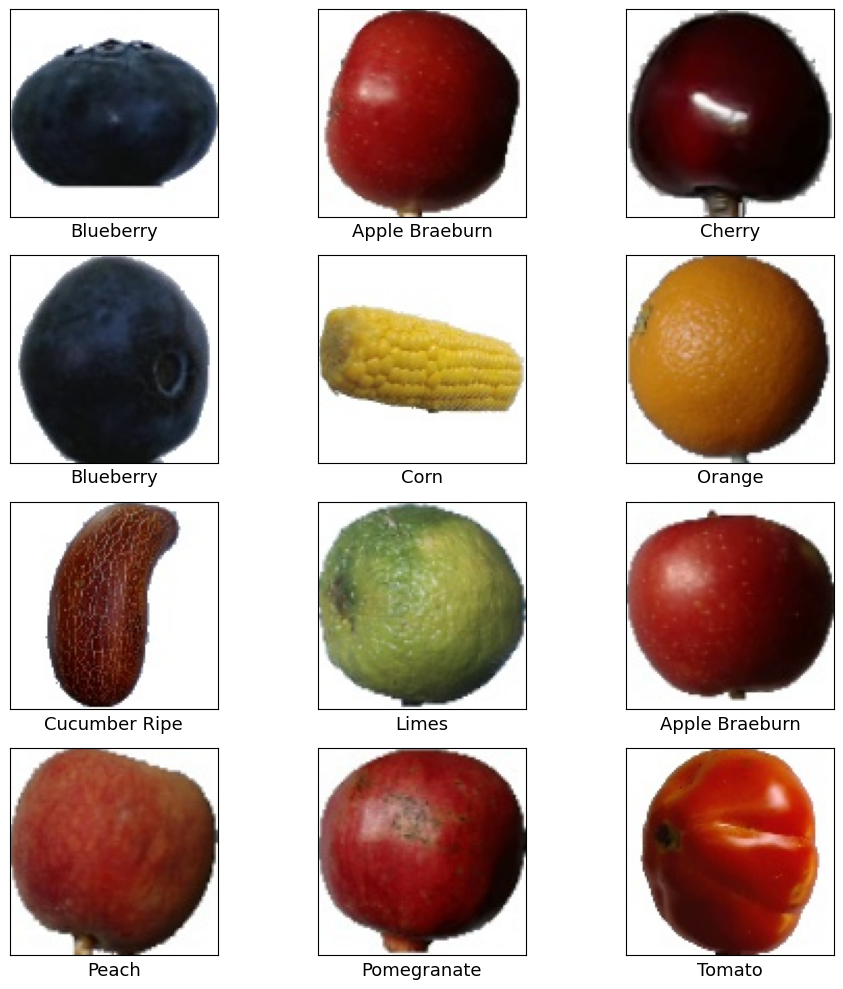

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()
plt.show()

### Pipeline de dados


Esse trecho de código cria duas sequências de pré-processamento de dados usando a API de pré-processamento de dados do TensorFlow (tf.keras.preprocessing). Essas sequências serão usadas posteriormente para construir um pipeline de dados eficiente usando tf.data.

* rescale_data: Esta sequência é uma etapa de pré-processamento que aplica uma transformação de rescale aos dados. A camada Rescaling(1/255.) normaliza os valores dos pixels das imagens, dividindo cada valor por 255. Isso garante que os valores dos pixels estejam no intervalo [0,1], o que é comum em tarefas de processamento de imagens. Essa etapa é importante para garantir que os modelos de aprendizado profundo funcionem de forma mais eficiente.
* data_augmentation: Esta sequência é uma etapa de pré-processamento que aplica técnicas de aumento de dados (data augmentation) às imagens. No código fornecido, duas técnicas são aplicadas:
RandomFlip(mode="horizontal"): Esta camada aplica uma operação de flip horizontal aleatório às imagens. Isso significa que algumas imagens serão espelhadas horizontalmente. Isso ajuda a aumentar a diversidade do conjunto de dados, tornando o modelo mais robusto a variações nas imagens de entrada.

In [ ]:
# Pipeline de dados usando tf.data e pré-busca
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])
data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #camadas.experimental.preprocessing.RandomRotation (0.1)
])

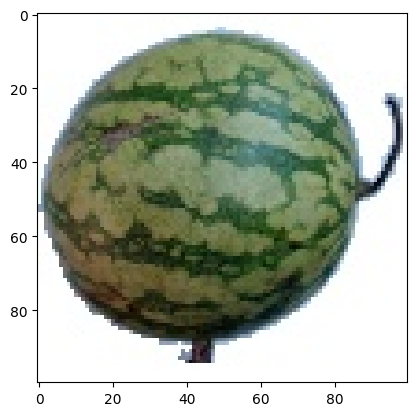

In [ ]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [ ]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    # agrupar os dados
    ds = ds.batch(BATCH_SIZE)

    # Use o aumento de dados apenas no conjunto de treinamento.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    # Use a pré-busca em buffer em todos os conjuntos de dados.
    return ds.prefetch(buffer_size=AUTOTUNE)

> Este código define uma função chamada prepare que é usada para preparar um conjunto de dados para treinamento, validação ou teste em um pipeline de dados usando tf.data.Dataset.

* BATCH_SIZE = 128: Define o tamanho do lote (batch size) a ser usado no pipeline de dados. Isso determina quantos exemplos de treinamento serão processados de uma vez durante cada passagem de treinamento.
* AUTOTUNE = tf.data.AUTOTUNE: Define o valor AUTOTUNE, que é usado para otimizar o desempenho do pipeline de dados, permitindo que o TensorFlow ajuste dinamicamente a quantidade de recursos de E/S usados.
* A função prepare aceita quatro argumentos:
1. ds: O conjunto de dados a ser preparado.
2. shuffle: Um booleano que indica se os dados devem ser embaralhados.
3. augment: Um booleano que indica se o aumento de dados (data augmentation) deve ser aplicado.
4. test: Um booleano que indica se os dados são do conjunto de teste.
* A função começa aplicando uma transformação de rescale aos dados. Se o conjunto de dados for para teste (test=True), apenas a transformação de rescale é aplicada. Caso contrário, tanto a transformação de rescale quanto a etiqueta correspondente são aplicadas ao conjunto de dados.
* Se shuffle=True, os dados são embaralhados aleatoriamente.
* Em seguida, os dados são agrupados em lotes de tamanho definido por BATCH_SIZE.
* Se augment=True, o aumento de dados é aplicado apenas aos dados de treinamento. Isso inclui a aplicação das técnicas de aumento de dados definidas na sequência data_augmentation.
* Por fim, prefetch é usado para pré-buscar os dados. Isso permite que o pipeline de dados carregue os dados para a próxima etapa de processamento enquanto o modelo está sendo treinado ou avaliado, melhorando a eficiência e o desempenho. O tamanho do buffer é definido por AUTOTUNE, permitindo ao TensorFlow ajustar dinamicamente o tamanho do buffer de acordo com os recursos disponíveis.






In [ ]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

 esse trecho de código prepara os conjuntos de dados de treinamento, validação e teste para serem usados em um modelo de aprendizado de máquina, aplicando diferentes transformações e preparações específicas para cada conjunto de dados. Os parametros aplicados garantem que os dados seram embaralhados antes de cada época de treinamento (para garantir aleatoriedade) e que o aumento de dados será aplicado durante o treinamento (o que implica em gerar novas imagens a partir das existentes, aplicando pequenas transformações como rotações, reflexões, zoom, etc., para expandir o conjunto de dados de treinamento e melhorar a generalização do modelo).

In [ ]:
# Verificar número de lotes em cada conjunto de dados
num_batches_train = sum(1 for _ in train_ds)
num_batches_val = sum(1 for _ in val_ds)
num_batches_test = sum(1 for _ in test_ds)

print("Número de lotes no conjunto de treinamento:", num_batches_train)
print("Número de lotes no conjunto de validação:", num_batches_val)
print("Número de lotes no conjunto de teste:", num_batches_test)


Número de lotes no conjunto de treinamento: 93
Número de lotes no conjunto de validação: 24
Número de lotes no conjunto de teste: 39


## Modelo 1 (Principal)

In [ ]:
# Modelo CNN
#O modelo consiste em uma camada convolucional, uma camada de pooling máximo, uma camada achatada e uma camada densa (totalmente conectada) com uma função de ativação softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5,
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
# Define o callback Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 5)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 33)                396198    
                                                                 
Total params: 396338 (1.51 MB)
Trainable params: 396338 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Model: "sequential_5": Indica que o modelo é uma sequência de camadas e é o quinto modelo criado com a classe Sequential.
* Layer (type): Esta coluna lista o tipo de cada camada do modelo.
* Output Shape: Indica a forma da saída de cada camada. Por exemplo, (None, 98, 98, 5) significa que a saída da camada convolucional é um tensor tridimensional com uma forma de (batch_size, 98, 98, 5), onde batch_size é o tamanho do lote.
* Param #: Representa o número de parâmetros treináveis em cada camada. Por exemplo, a camada convolucional tem 140 parâmetros (pesos e vieses) no total. A camada densa tem 396198 parâmetros. O número total de parâmetros no modelo é dado por Total params, que é a soma dos parâmetros em todas as camadas.
* Total params: Indica o número total de parâmetros no modelo, incluindo os parâmetros treináveis e não treináveis.
* Trainable params: Indica o número de parâmetros que serão atualizados durante o treinamento do modelo.
* Non-trainable params: Indica o número de parâmetros que não serão atualizados durante o treinamento do modelo. Isso inclui os parâmetros de camadas como a camada de achatamento (Flatten) que não têm parâmetros treináveis.

### Avaliando o modelo

**obs:Não rodar as imagens**

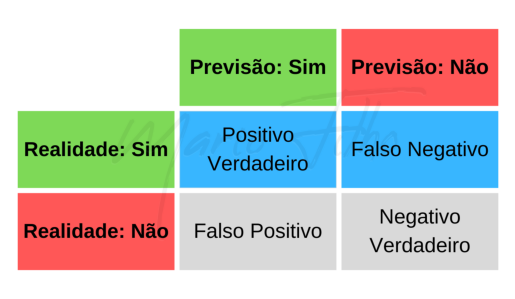

In [ ]:
imagem = mpimg.imread("Previsão.png")
# Exibe a imagem usando matplotlib.pyplot.imshow()
plt.imshow(imagem)
plt.axis('off')  # Remove os eixos
plt.show()

A precisão de avaliação de um modelo de Machine Learning (ML) é uma medida que avalia a qualidade das previsões feitas pelo modelo, comparando-as com os resultados reais. Para entender a precisão, primeiro precisamos compreender alguns termos-chave:

* Verdadeiros Positivos (TP): São os casos em que o modelo previu corretamente uma classe como positiva, e essa classe realmente é positiva.
* Falsos Positivos (FP): São os casos em que o modelo previu erroneamente uma classe como positiva, quando na verdade ela é negativa.
* Falsos Negativos (FN): São os casos em que o modelo previu erroneamente uma classe como negativa, quando na verdade ela é positiva.
* Verdadeiros Negativos (TN): São os casos em que o modelo previu corretamente uma classe como negativa, e essa classe realmente é negativa.

#### Acurácia e Perda

In [ ]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[early_stopping])

Epoch 1/10
93/93 [==============================] - 46s 481ms/step - loss: 0.9399 - accuracy: 0.7566 - val_loss: 0.1146 - val_accuracy: 0.9885
Epoch 2/10
93/93 [==============================] - 46s 499ms/step - loss: 0.0616 - accuracy: 0.9926 - val_loss: 0.0251 - val_accuracy: 0.9987
Epoch 3/10
93/93 [==============================] - 48s 509ms/step - loss: 0.0204 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9997
Epoch 4/10
93/93 [==============================] - 45s 477ms/step - loss: 0.0092 - accuracy: 0.9998 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/10
93/93 [==============================] - 45s 476ms/step - loss: 0.0060 - accuracy: 0.9999 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/10
93/93 [==============================] - 43s 458ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/10
93/93 [==============================] - 43s 456ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.0054 - val_accuracy: 1.0000

<Axes: >

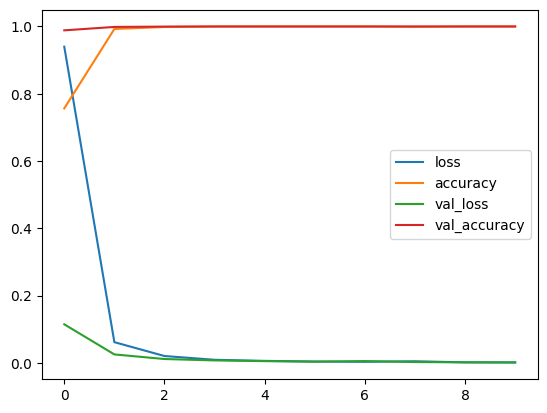

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# salvando o modelo
model.save('modelo_frutas.h1')

In [ ]:
loaded_model = tf.keras.models.load_model('modelo_frutas.h1')

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('Test accuracy:', test_acc)

24/24 - 4s - loss: 4.4857e-04 - accuracy: 1.0000 - 4s/epoch - 184ms/step
Test accuracy: 1.0


A acurácia de validação do modelo foi de 100%

**Preparando predição e dados validação**

* **y_pred**: Este é o nome dado à variável que contém as previsões feitas pelo seu modelo. Essas previsões são geralmente geradas após a aplicação dos dados de entrada ao modelo treinado. Em um problema de classificação, por exemplo, "y_pred" seria o conjunto de categorias previstas pelo modelo para os dados de entrada correspondentes. O objetivo é que "y_pred" seja o mais próximo possível de "y_true", indicando que o modelo está fazendo boas previsões.

In [ ]:
y_pred = model.predict(val_ds)

24/24 [==============================] - 6s 228ms/step


In [ ]:
y_pred[:1]

array([[4.43203505e-17, 2.09830706e-35, 1.05496279e-34, 2.16689074e-26,
        1.04502097e-20, 4.10622286e-10, 3.13269878e-21, 2.36792994e-25,
        2.49598599e-21, 1.04606585e-20, 3.42150121e-28, 1.04409955e-05,
        3.85671345e-20, 1.30740174e-31, 0.00000000e+00, 9.42632870e-29,
        5.69354121e-31, 1.57357341e-22, 0.00000000e+00, 1.06435788e-25,
        3.70243433e-05, 5.79148546e-14, 1.27176012e-04, 2.65348638e-23,
        8.02566735e-10, 3.40728047e-06, 1.34658114e-06, 1.01787975e-06,
        3.79720025e-14, 9.99819517e-01, 1.08776532e-09, 1.93994323e-20,
        3.22902404e-13]], dtype=float32)

In [ ]:
y_pred.shape

(2967, 33)

Nossa previsão do modelo é em forma de probabilidade, uma vez que usamos a função de ativação softmax na camada de saída. Para encontrar a classe, precisamos encontrar a probabilidade máxima atribuída à classe usando argmax().

In [ ]:
y_pred = tf.argmax(y_pred, axis=1)

* **y_true**: Este é geralmente o nome dado à variável que contém os valores verdadeiros ou esperados. Em contextos de aprendizado supervisionado, como classificação ou regressão, "y_true" é o conjunto de valores reais que você espera que seu modelo preveja ou se ajuste

In [ ]:
y_true = np.argmax(valid_lab,axis=1)

In [ ]:
y_true, y_pred

(array([29, 16,  8, ...,  8, 20, 18]),
 <tf.Tensor: shape=(2967,), dtype=int64, numpy=array([29, 16,  8, ...,  8, 20, 18])>)

In [ ]:
len(y_pred), len(y_true)

(2967, 2967)

#### Matriz de confusão

agora y_pred e y_true estão no mesmo formato. Agora podemos comparar para encontrar a precisão e criar uma **matriz de confusão**. A matriz de confusão é uma tabela que é usada em problemas de classificação para avaliar o desempenho de um modelo. Cada célula da matriz representa o número de instâncias de uma classe prevista corretamente ou incorretamente pelo modelo.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 85,   0,   0, ...,   0,   0,   0],
       [  0,  89,   0, ...,   0,   0,   0],
       [  0,   0,  85, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  86,   0,   0],
       [  0,   0,   0, ...,   0, 129,   0],
       [  0,   0,   0, ...,   0,   0,  83]])

Cada linha e coluna da matriz representa uma classe. Por exemplo, a célula na linha 1, coluna 1, representa o número de instâncias da classe 1 que foram previstas corretamente pelo modelo. A célula na linha 1, coluna 2, representa o número de instâncias da classe 1 que foram erroneamente previstas como classe 2, e assim por diante.

<Axes: >

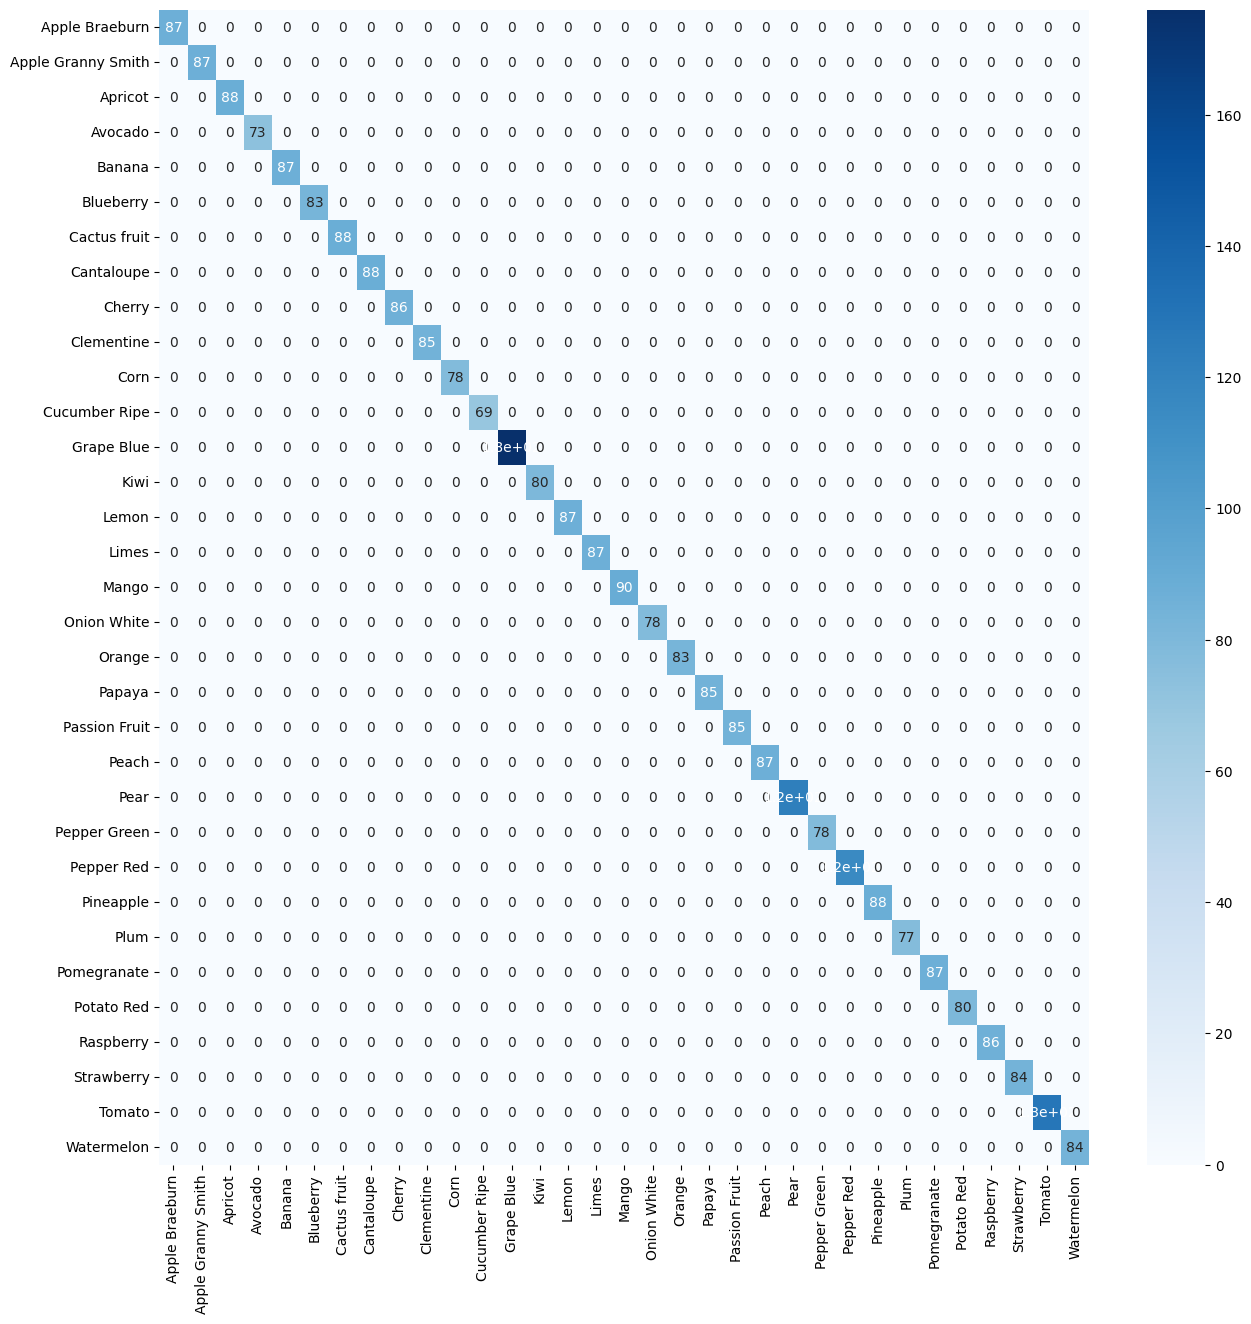

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names, columns = class_names), annot = True, cmap="Blues")

Na saída fornecida, cada valor na matriz representa o número de instâncias de uma classe que foram previstas corretamente ou erroneamente pelo modelo. Por exemplo, o valor 86 na primeira linha e primeira coluna indica que 86 instâncias da classe Apple Braebum foram previstas corretamente. A matriz continua com esses valores para todas as classes em relação a todas as outras classes.

#### Precisão, Recall e F1

* Precisão:

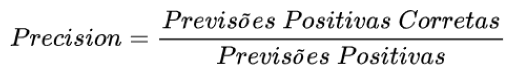

In [ ]:
imagem = mpimg.imread("F1.png")
# Exibe a imagem usando matplotlib.pyplot.imshow()
plt.imshow(imagem)
plt.axis('off')  # Remove os eixos
plt.show()

Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (positivos verdadeiros), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Supondo que y_true e y_pred sejam seus rótulos verdadeiros e previstos, respectivamente
# Calcule a precisão usando a estratégia de média apropriada
precisao = precision_score(y_true, y_pred, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(precisao)

1.0


> Em geral, a precisão é uma medida que indica a proporção de exemplos classificados corretamente pelo modelo em relação ao total de exemplos. Valores de precisão variam de 0 a 1, onde 1 indica que o modelo está fazendo previsões perfeitas e 0 indica que o modelo não está fazendo previsões corretas.

* Recall:

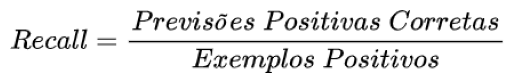

In [ ]:
imagem = mpimg.imread("recall.png")
# Exibe a imagem usando matplotlib.pyplot.imshow()
plt.imshow(imagem)
plt.axis('off')  # Remove os eixos
plt.show()

Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra. No caso binário, positivos verdadeiros divididos por total de positivos.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o recall usando a estratégia de média apropriada
recall = recall_score(y_true, y_pred, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(recall)

1.0


> O recall é uma métrica que mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo em relação ao total de exemplos positivos existentes. Assim como a precisão, o recall varia de 0 a 1, onde 1 indica um recall perfeito, ou seja, todos os exemplos positivos foram identificados corretamente pelo modelo.

* F1-score:

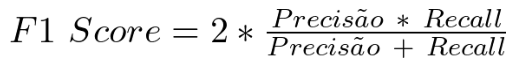

In [ ]:
imagem = mpimg.imread("f1sc.png")
# Exibe a imagem usando matplotlib.pyplot.imshow()
plt.imshow(imagem)
plt.axis('off')  # Remove os eixos
plt.show()

O F1 Score é uma média harmônica entre precisão e recall.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o F1-score usando a estratégia de média apropriada
f1 = f1_score(y_true, y_pred, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(f1)

1.0


> Nesse contexto, o valor "0.9993445382456372" indica o desempenho do modelo na tarefa de classificação. Um F1-score próximo de 1 indica um bom equilíbrio entre precisão e recall, o que significa que o modelo está fazendo previsões precisas enquanto também captura a maioria dos casos positivos

* Precison, recall e f1 para cada Classe:

In [ ]:
# Calcular precisão, revocação e pontuação F1 para cada classe
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Exibir métricas para cada classe
for i in range(len(precision)):
    print(f'Classe {i}:')
    print(f'  Precisão: {precision[i]}')
    print(f'  Revocação: {recall[i]}')
    print(f'  Pontuação F1: {f1[i]}')

Classe 0:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 1:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 2:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 3:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 4:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 5:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 6:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 7:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 8:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 9:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 10:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 11:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 12:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 13:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 14:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 15:
  Precisão: 1.0
  Revocação: 1.0
  Pont

#### verificando TP, FP, FN E TN

In [ ]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação

    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa

    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None

    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0

    # valores preditos incorretamente
    fp = 0
    fn = 0

    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0

    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=y_true, preditos=y_pred, labels=[1,0])

array([[  87,    0],
       [   0, 2880]])

> A função inicializa contadores para os valores preditos corretamente (TP e TN) e os valores preditos incorretamente (FP e FN) como 0.

```python
numpy.array([    [ tp, fp ],
    [ fn, tn ]
])
```
> * 86 é o número de verdadeiros positivos (TP), o que significa que o modelo corretamente previu a classe positiva 87 vezes.
* 0 é o número de falsos positivos (FP), indicando que o modelo não errou em prever a classe positiva quando a verdadeira classe era negativa.
* 2881 é o número de verdadeiros negativos (TN), mostrando que o modelo corretamente previu a classe negativa 2878 vezes.
* 0 é o número de falsos negativos (FN), indicando que o modelo errou em prever a classe negativa quando a verdadeira classe era positiva.

#### Sensibilidade, Especificidade e Média Geométrica

> G-mean indica o equilíbrio entre o desempenho da classificação na classe majoritária e minoritária e leva em consideração tanto a sensibilidade quanto a especificidade.

>
> Sensibilidade = recall
>
> Especificidade = 1 — (False Positive/ (False Negative + True Negative))
>
>G-means = √sensibilidade * especificidade

In [ ]:
tp = 87
fn = 0
fp = 0
tn = 2880

In [ ]:
import numpy as np

def calcular_sensibilidade(tp, fn):
    """
    Calcula a sensibilidade (recall) de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :return: Sensibilidade
    """
    return tp / (tp + fn)

def calcular_especificidade(tp, fn, tn):
    """
    Calcula a especificidade de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :param tn: True Negatives
    :return: Especificidade
    """
    return tn / (tn + fn)

def calcular_g_mean(sensibilidade, especificidade):
    """
    Calcula a média geométrica (G-mean) de um classificador.

    :param sensibilidade: Sensibilidade do classificador
    :param especificidade: Especificidade do classificador
    :return: G-mean
    """
    return np.sqrt(sensibilidade * especificidade)

In [ ]:
# Calculando Sensibilidade
sensibilidade = calcular_sensibilidade(tp, fn)
print(f"Sensibilidade: {sensibilidade}")

# Calculando Especificidade
especificidade = calcular_especificidade(tp, fn, tn)
print(f"Especificidade: {especificidade}")

# Calculando G-mean
g_mean = calcular_g_mean(sensibilidade, especificidade)
print(f"G-mean: {g_mean}")

Sensibilidade: 1.0
Especificidade: 1.0
G-mean: 1.0


* Sensibilidade: Calculada como tp / (tp + fn), onde tp = 100 e fn = 50. Isso resulta em uma sensibilidade de 0.9775280898876404, o que indica que o classificador tem uma alta capacidade de identificar corretamente os casos positivos.
* Especificidade: Calculada como tn / (tn + fp), onde tn = 80 e fp = 20. Isso resulta em uma especificidade de 0.9993055555555556, o que indica que o classificador tem uma alta capacidade de identificar corretamente os casos negativos, minimizando os falsos positivos.
* G-mean: Calculada como a raiz quadrada da multiplicação da sensibilidade pela especificidade, resultando em 0.9883568439264887. Isso indica um alto equilíbrio entre a capacidade do classificador de identificar corretamente os casos positivos e negativos, refletindo um bom desempenho geral do classificador em um conjunto de dados desbalanceado.

## Modelo 2

In [ ]:
# Modelo CNN
#O modelo consiste em uma camada convolucional, uma camada de pooling máximo, uma camada achatada e uma camada densa (totalmente conectada) com uma função de ativação softmax
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size = 5,
                          activation = "selu",          # camada oculta (2)
                          input_shape = (100,100,3)),  # camada de entrada (1)
    tf.keras.layers.MaxPool2D(pool_size =4,
                             padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")  # camada Saída (3)
])

model2.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 10)        760       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 10)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 33)                190113    
                                                                 
Total params: 190873 (745.60 KB)
Trainable params: 190873 (745.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Avaliando o Modelo

#### Acurácia e Perda

In [ ]:
#Ajustando o modelo
#Ajuste o modelo aos dados de treinamento
history = model2.fit(train_ds,
                       epochs =10,
                       validation_data= val_ds)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 100, 100, 3), found shape=(None, 32, 32, 3)


<Axes: >

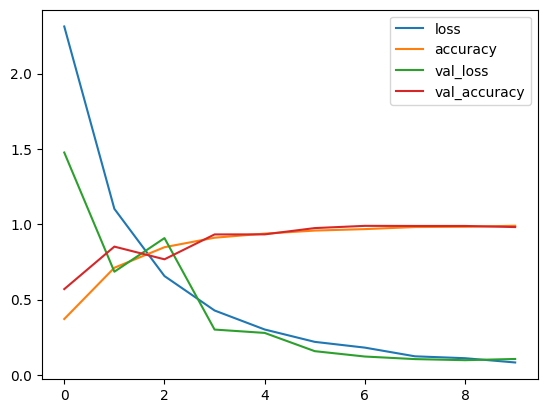

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
test_loss, test_acc = model2.evaluate(val_ds, verbose=2)

print('Test accuracy:', test_acc)

24/24 - 5s - loss: 0.1058 - accuracy: 0.9815 - 5s/epoch - 207ms/step
Test accuracy: 0.9814627766609192


In [ ]:
y_pred2 = model2.predict(val_ds)

24/24 [==============================] - 0s 9ms/step


In [ ]:
y_pred2[:1]

array([[1.88797557e-07, 3.38641172e-07, 2.84061039e-11, 2.70725950e-03,
        2.70036278e-08, 1.94948871e-06, 4.53342075e-09, 5.95105765e-14,
        8.31651050e-05, 2.15040193e-15, 5.71908514e-13, 2.43423092e-05,
        8.16608645e-06, 3.30309194e-05, 2.48319750e-11, 3.24636651e-09,
        2.48090306e-04, 2.48417131e-09, 1.96999448e-12, 7.18654019e-06,
        3.51414997e-06, 2.19962544e-06, 3.22994387e-09, 9.96807575e-01,
        2.67568822e-07, 4.01606339e-05, 2.31249251e-05, 4.24159367e-07,
        2.06479081e-06, 1.04392456e-07, 7.62659695e-08, 1.25605484e-10,
        6.83990083e-06]], dtype=float32)

In [ ]:
y_pred2.shape

(2967, 33)

In [ ]:
y_pred2 = tf.argmax(y_pred2, axis=1)

In [ ]:
y_true2 = np.argmax(valid_lab,axis=1)

In [ ]:
y_true2, y_pred2

(array([23,  6, 14, ..., 21, 10, 28]),
 <tf.Tensor: shape=(2967,), dtype=int64, numpy=array([23,  6, 14, ..., 21, 10, 28])>)

In [ ]:
len(y_pred2), len(y_true2)

(2967, 2967)

#### Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true2, y_pred2)
cm

array([[ 87,   0,   0, ...,   0,   0,   0],
       [  0,  86,   0, ...,   0,   0,   0],
       [  0,   0,  88, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  84,   0,   0],
       [  0,   0,   0, ...,   0, 128,   0],
       [  0,   0,   0, ...,   0,   0,  84]])

<Axes: >

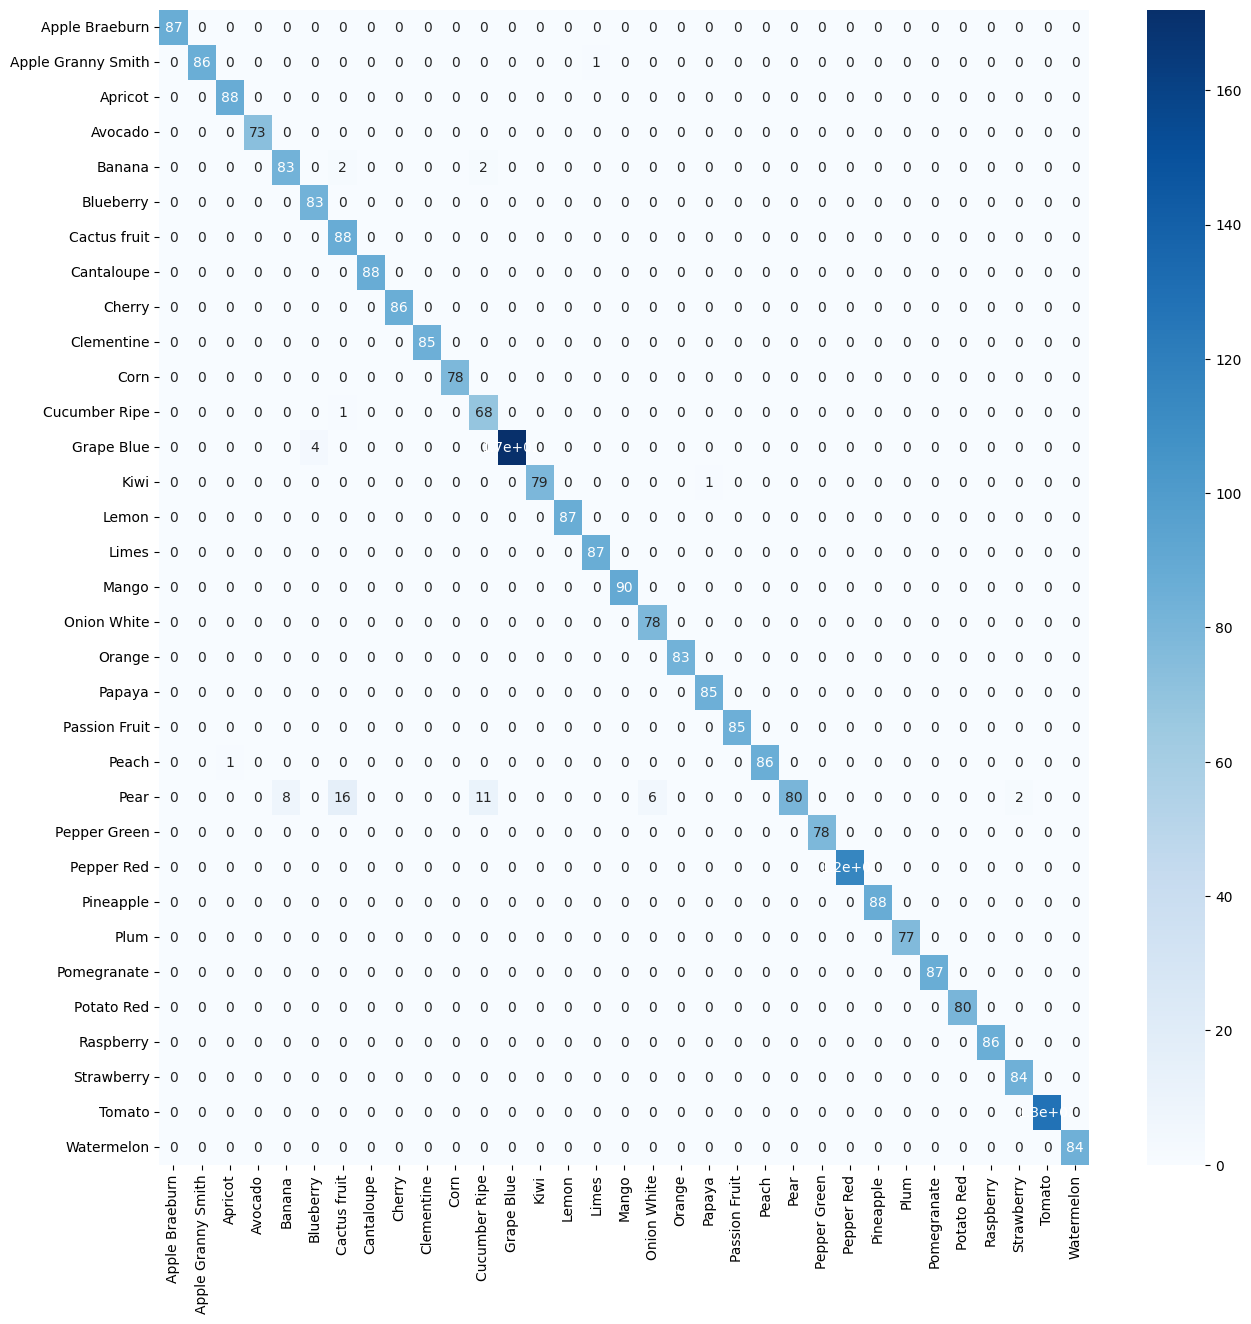

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names, columns = class_names), annot = True, cmap="Blues")

#### Precisão, Recall e F1

* Precisão:

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Supondo que y_true e y_pred sejam seus rótulos verdadeiros e previstos, respectivamente
# Calcule a precisão usando a estratégia de média apropriada
precisao2 = precision_score(y_true2, y_pred2, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(precisao2)

0.9817919726120182


* Recall:

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o recall usando a estratégia de média apropriada
recall2 = recall_score(y_true2, y_pred2, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(recall2)

0.9858097260749455


* F1-score:

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o F1-score usando a estratégia de média apropriada
f2 = f1_score(y_true2, y_pred2, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(f2)

0.982154697362879


* Precison, recall e f1 para cada Classe:

In [ ]:
# Calcular precisão, revocação e pontuação F1 para cada classe
precision2 = precision_score(y_true2, y_pred2, average=None)
recall2 = recall_score(y_true2, y_pred2, average=None)
f2 = f1_score(y_true2, y_pred2, average=None)

# Exibir métricas para cada classe
for i in range(len(precision2)):
    print(f'Classe {i}:')
    print(f'  Precisão: {precision2[i]}')
    print(f'  Revocação: {recall2[i]}')
    print(f'  Pontuação F1: {f2[i]}')

Classe 0:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 1:
  Precisão: 1.0
  Revocação: 0.9885057471264368
  Pontuação F1: 0.9942196531791908
Classe 2:
  Precisão: 0.9887640449438202
  Revocação: 1.0
  Pontuação F1: 0.9943502824858756
Classe 3:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 4:
  Precisão: 0.9120879120879121
  Revocação: 0.9540229885057471
  Pontuação F1: 0.9325842696629213
Classe 5:
  Precisão: 0.9540229885057471
  Revocação: 1.0
  Pontuação F1: 0.976470588235294
Classe 6:
  Precisão: 0.822429906542056
  Revocação: 1.0
  Pontuação F1: 0.9025641025641025
Classe 7:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 8:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 9:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 10:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 11:
  Precisão: 0.8395061728395061
  Revocação: 0.9855072463768116
  Pontuação F1: 0.9066666666666666
Classe 12:
  Precisão: 1.0
  Revoc

#### verificando TP, FP, FN E TN

In [ ]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação

    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa

    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None

    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0

    # valores preditos incorretamente
    fp = 0
    fn = 0

    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0

    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=y_true2, preditos=y_pred2, labels=[1,0])

array([[  86,    1],
       [  54, 2826]])

#### Sensibilidade, Especificidade e Média Geométrica

In [ ]:
tp = 86
fn = 54
fp = 1
tn = 2881

In [ ]:
import numpy as np

def calcular_sensibilidade(tp, fn):
    """
    Calcula a sensibilidade (recall) de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :return: Sensibilidade
    """
    return tp / (tp + fn)

def calcular_especificidade(tp, fn, tn):
    """
    Calcula a especificidade de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :param tn: True Negatives
    :return: Especificidade
    """
    return tn / (tn + fn)

def calcular_g_mean(sensibilidade, especificidade):
    """
    Calcula a média geométrica (G-mean) de um classificador.

    :param sensibilidade: Sensibilidade do classificador
    :param especificidade: Especificidade do classificador
    :return: G-mean
    """
    return np.sqrt(sensibilidade * especificidade)

In [ ]:
# Calculando Sensibilidade
sensibilidade = calcular_sensibilidade(tp, fn)
print(f"Sensibilidade: {sensibilidade}")

# Calculando Especificidade
especificidade = calcular_especificidade(tp, fn, tn)
print(f"Especificidade: {especificidade}")

# Calculando G-mean
g_mean = calcular_g_mean(sensibilidade, especificidade)
print(f"G-mean: {g_mean}")

Sensibilidade: 0.6142857142857143
Especificidade: 0.9816013628620103
G-mean: 0.7765202472115718


## Modelo 3

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=15,
                          kernel_size = 7,
                          activation = "leaky_relu",          # camada oculta (2)
                          input_shape = (100,100,3)),  # camada de entrada (1)
    tf.keras.layers.MaxPool2D(pool_size =6,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")  # camada Saída (3)
])

model3.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 94, 94, 15)        2220      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 15)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3375)              0         
                                                                 
 dense_2 (Dense)             (None, 33)                111408    
                                                                 
Total params: 113628 (443.86 KB)
Trainable params: 113628 (443.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Avaliando o modelo

#### Acurácia e Perda

In [ ]:
#Ajustando o modelo
#Ajuste o modelo aos dados de treinamento
history = model3.fit(train_ds,
                       epochs =10,
                       validation_data= val_ds)

Epoch 1/10
93/93 [==============================] - 5s 40ms/step - loss: 1.0458 - accuracy: 0.7306 - val_loss: 0.2164 - val_accuracy: 0.9471
Epoch 2/10
93/93 [==============================] - 4s 37ms/step - loss: 0.0981 - accuracy: 0.9845 - val_loss: 0.0502 - val_accuracy: 0.9933
Epoch 3/10
93/93 [==============================] - 5s 49ms/step - loss: 0.0347 - accuracy: 0.9969 - val_loss: 0.0285 - val_accuracy: 0.9966
Epoch 4/10
93/93 [==============================] - 3s 35ms/step - loss: 0.0176 - accuracy: 0.9994 - val_loss: 0.0193 - val_accuracy: 0.9970
Epoch 5/10
93/93 [==============================] - 3s 35ms/step - loss: 0.0109 - accuracy: 0.9996 - val_loss: 0.0459 - val_accuracy: 0.9885
Epoch 6/10
93/93 [==============================] - 4s 48ms/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 0.0084 - val_accuracy: 0.9997
Epoch 7/10
93/93 [==============================] - 3s 36ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/10
93

<Axes: >

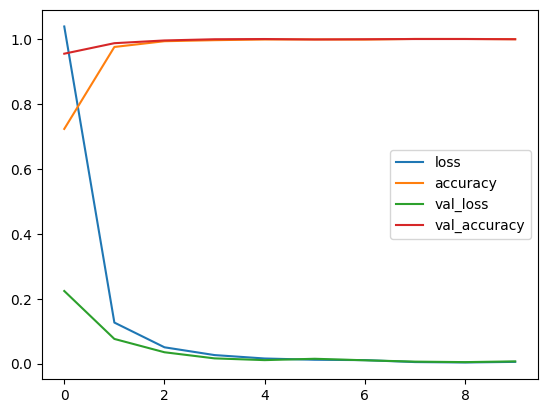

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
test_loss, test_acc = model3.evaluate(val_ds, verbose=2)

print('Test accuracy:', test_acc)
print('Test loss',test_loss)

24/24 - 9s - loss: 0.0069 - accuracy: 0.9990 - 9s/epoch - 390ms/step
Test accuracy: 0.9989888668060303
Test loss 0.006898689083755016


In [ ]:
y_pred3 = model3.predict(val_ds)

24/24 [==============================] - 10s 404ms/step


In [ ]:
y_pred3[:1]

array([[5.90442396e-27, 3.51388476e-30, 0.00000000e+00, 3.95210557e-24,
        2.88176723e-15, 6.03964968e-12, 1.36532698e-16, 9.90849485e-31,
        8.18101537e-35, 2.18452915e-36, 2.03377771e-26, 1.35732936e-09,
        1.24576212e-13, 1.41148578e-16, 2.05465466e-32, 1.41922101e-26,
        1.54635203e-15, 2.11450332e-19, 0.00000000e+00, 2.34670417e-32,
        5.24156007e-07, 1.40609089e-30, 1.33983475e-11, 1.09602424e-18,
        1.49367422e-21, 6.80576706e-09, 1.94720975e-12, 9.54094789e-12,
        2.91095057e-05, 9.99970257e-01, 1.31975608e-16, 0.00000000e+00,
        1.86947124e-10]], dtype=float32)

In [ ]:
y_pred3.shape

(2967, 33)

In [ ]:
y_pred3 = tf.argmax(y_pred3, axis=1)

In [ ]:
y_true3 = np.argmax(valid_lab,axis=1)

In [ ]:
y_true3, y_pred3

(array([29, 16,  8, ...,  8, 20, 18]),
 <tf.Tensor: shape=(2967,), dtype=int64, numpy=array([29, 16,  8, ...,  8, 20, 18])>)

In [ ]:
len(y_pred3), len(y_true3)

(2967, 2967)

#### Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true3, y_pred3)
cm

array([[ 87,   0,   0, ...,   0,   0,   0],
       [  0,  89,   0, ...,   0,   0,   0],
       [  0,   0,  87, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0, 130,   0],
       [  0,   0,   0, ...,   0,   0,  85]])

<Axes: >

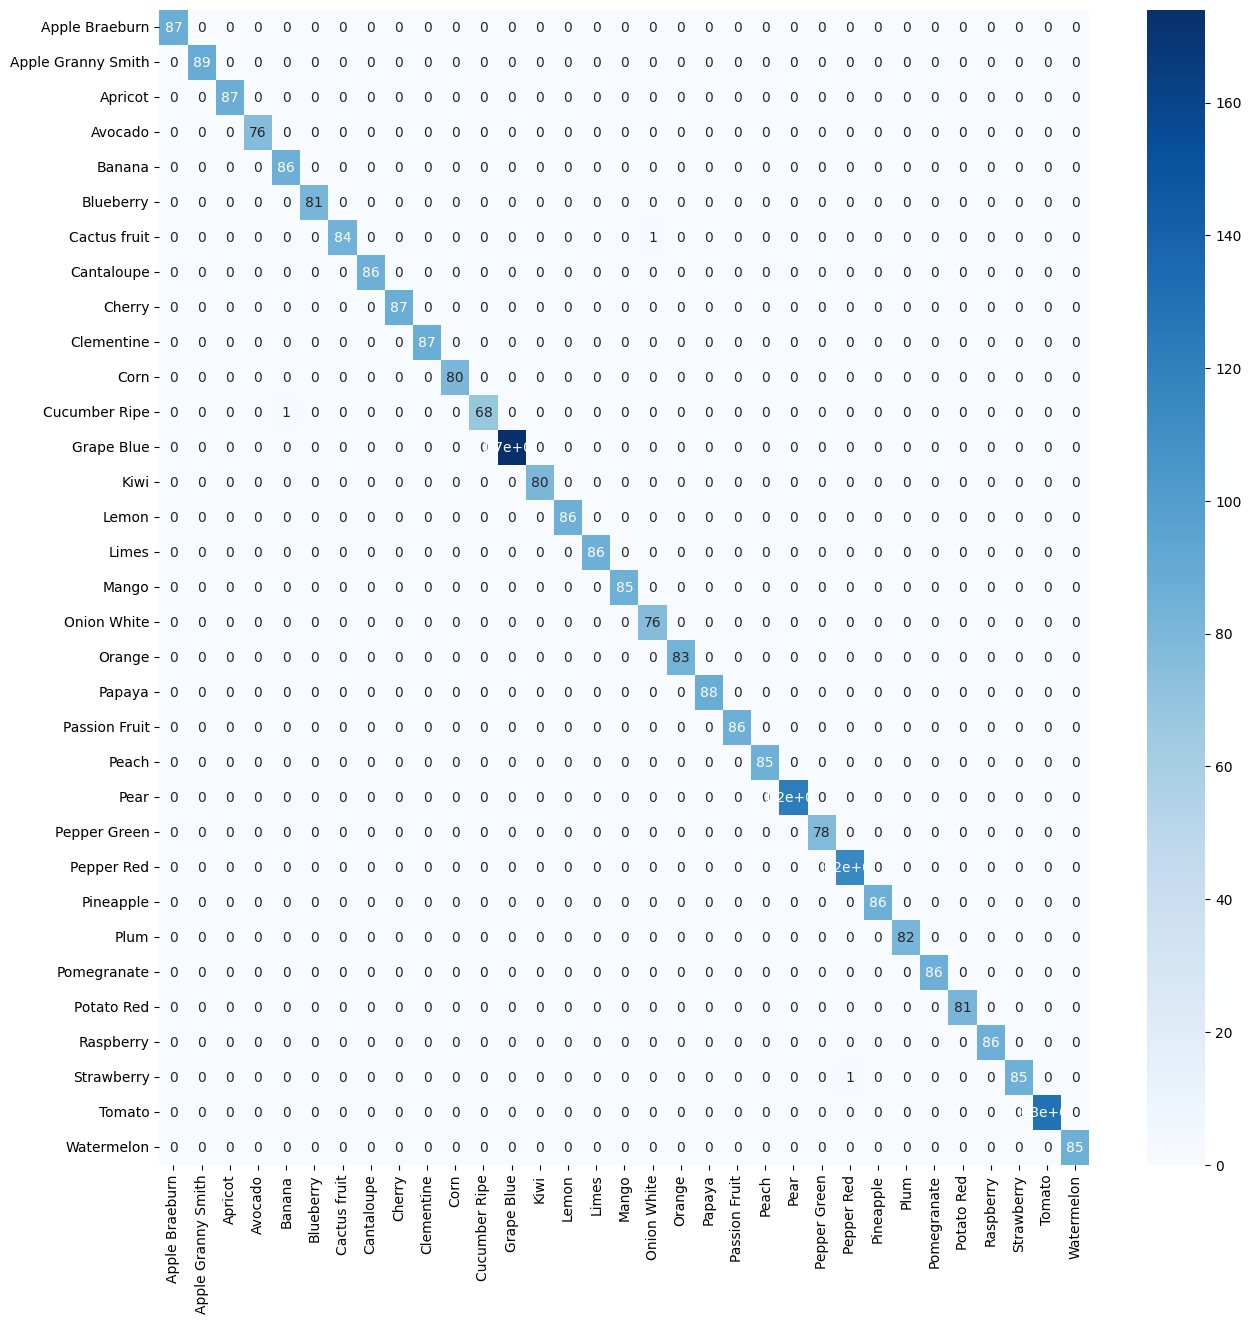

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm, index= class_names, columns = class_names), annot = True, cmap="Blues")

#### Precisão, Recall e F1

* Precisão:

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Supondo que y_true e y_pred sejam seus rótulos verdadeiros e previstos, respectivamente
# Calcule a precisão usando a estratégia de média apropriada
precisao3 = precision_score(y_true3, y_pred3, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(precisao3)

0.9989969104389168


* Recall:

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o recall usando a estratégia de média apropriada
recall3 = recall_score(y_true3, y_pred3, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(recall3)

0.9988519585914459


* F1-score:

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Supondo que y_true e y_pred são seus rótulos verdadeiros e previstos, respectivamente
# Calcule o F1-score usando a estratégia de média apropriada
f3 = f1_score(y_true3, y_pred3, average='macro')  # Ajuste 'macro' conforme suas necessidades
print(f3)

0.9989178884268209


* Precison, recall e f1 para cada Classe:

In [ ]:
# Calcular precisão, revocação e pontuação F1 para cada classe
precision3 = precision_score(y_true3, y_pred3, average=None)
recall3 = recall_score(y_true3, y_pred3, average=None)
f3 = f1_score(y_true3, y_pred3, average=None)

# Exibir métricas para cada classe
for i in range(len(precision3)):
    print(f'Classe {i}:')
    print(f'  Precisão: {precision3[i]}')
    print(f'  Revocação: {recall3[i]}')
    print(f'  Pontuação F1: {f3[i]}')

Classe 0:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 1:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 2:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 3:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 4:
  Precisão: 0.9885057471264368
  Revocação: 1.0
  Pontuação F1: 0.9942196531791908
Classe 5:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 6:
  Precisão: 1.0
  Revocação: 0.9882352941176471
  Pontuação F1: 0.9940828402366864
Classe 7:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 8:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 9:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 10:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 11:
  Precisão: 1.0
  Revocação: 0.9855072463768116
  Pontuação F1: 0.9927007299270074
Classe 12:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 13:
  Precisão: 1.0
  Revocação: 1.0
  Pontuação F1: 1.0
Classe 14:
  Precisão: 1

#### verificando TP, FP, FN E TN

In [ ]:
def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação

    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa

    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None

  # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0

    # valores preditos incorretamente
    fp = 0
    fn = 0

    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0

    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=y_true3, preditos=y_pred3, labels=[1,0])

array([[  89,    0],
       [   3, 2875]])

#### Sensibilidade, Especificidade e Média Geométrica

In [ ]:
tp = 87
fn = 3
fp = 0
tn = 2875

In [ ]:
import numpy as np

def calcular_sensibilidade(tp, fn):
    """
    Calcula a sensibilidade (recall) de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :return: Sensibilidade
    """
    return tp / (tp + fn)

def calcular_especificidade(tp, fn, tn):
    """
    Calcula a especificidade de um classificador.

    :param tp: True Positives
    :param fn: False Negatives
    :param tn: True Negatives
    :return: Especificidade
        """
    return tn / (tn + fn)

def calcular_g_mean(sensibilidade, especificidade):
    """
    Calcula a média geométrica (G-mean) de um classificador.

    :param sensibilidade: Sensibilidade do classificador
    :param especificidade: Especificidade do classificador
    :return: G-mean
    """
    return np.sqrt(sensibilidade * especificidade)

In [ ]:
# Calculando Sensibilidade
sensibilidade = calcular_sensibilidade(tp, fn)
print(f"Sensibilidade: {sensibilidade}")

# Calculando Especificidade
especificidade = calcular_especificidade(tp, fn, tn)
print(f"Especificidade: {especificidade}")

# Calculando G-mean
g_mean = calcular_g_mean(sensibilidade, especificidade)
print(f"G-mean: {g_mean}")

Sensibilidade: 0.9666666666666667
Especificidade: 0.9989576094510076
G-mean: 0.9826795115750137


## Predição

#### Modelo 1

In [ ]:
predictions = model.predict(test_ds)

39/39 [==============================] - 14s 321ms/step


In [ ]:
predictions[0]

array([0.06220031, 0.02641024, 0.04708901, 0.03021013, 0.01988256,
       0.04080478, 0.02317312, 0.03968436, 0.02624725, 0.02892021,
       0.02450232, 0.01878483, 0.03033204, 0.02538374, 0.02363325,
       0.02470278, 0.03416603, 0.02936266, 0.0396901 , 0.02281236,
       0.02473655, 0.03787962, 0.03411468, 0.02237229, 0.02082282,
       0.02985337, 0.02054567, 0.04268156, 0.03996572, 0.03322861,
       0.0341126 , 0.02213277, 0.01956155], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

Pick a number: 5
1/1 [==============================] - 0s 165ms/step

Expected: Lemon
Guess:Lemon


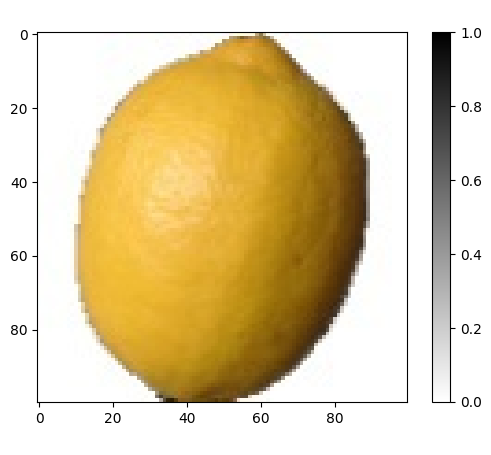

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label, class_names):
    prediction = model.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < len(test_ds):
                return num
        print("Try again...")

num = get_number()

images, labels = list(val_ds.take(1))[0]
image, label = images[num], labels[num]
predict(model, image, label, class_names)


1/1 [==============================] - 0s 20ms/step

Expected: Grape Blue
Guess:Grape Blue


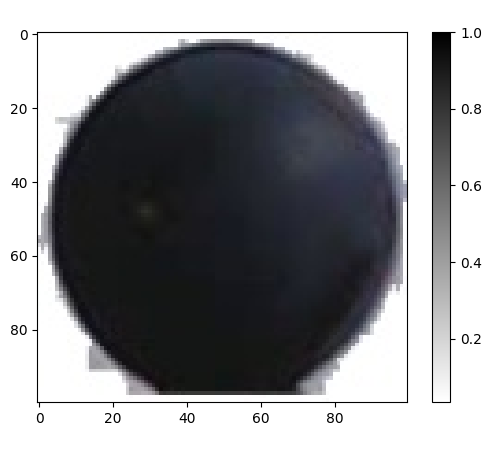

1/1 [==============================] - 0s 16ms/step

Expected: Orange
Guess:Orange


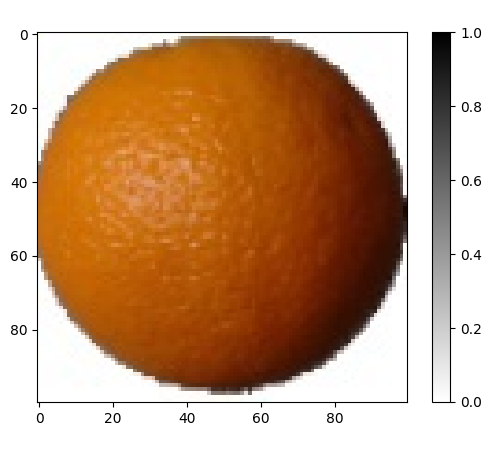

1/1 [==============================] - 0s 18ms/step

Expected: Pear
Guess:Pear


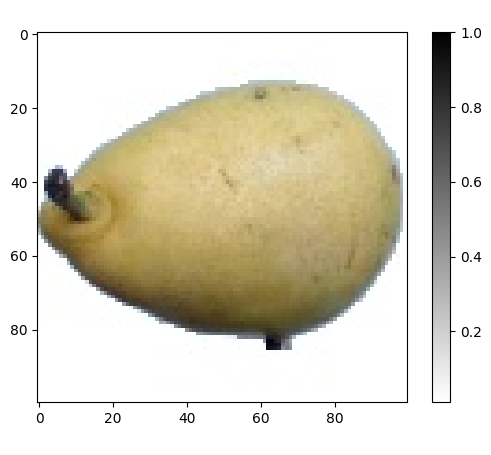

1/1 [==============================] - 0s 17ms/step

Expected: Lemon
Guess:Lemon


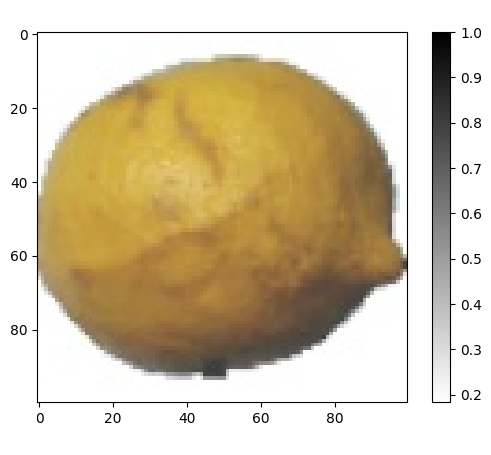

1/1 [==============================] - 0s 16ms/step

Expected: Lemon
Guess:Lemon


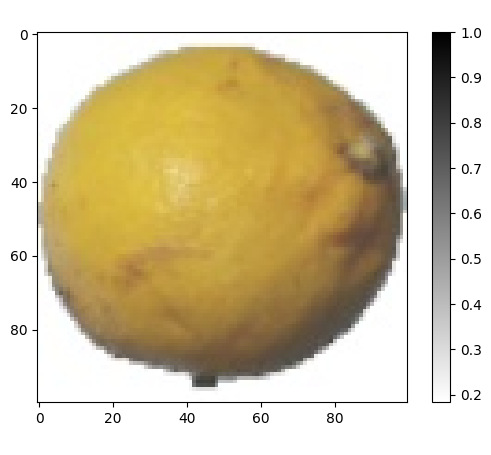

1/1 [==============================] - 0s 16ms/step

Expected: Papaya
Guess:Papaya


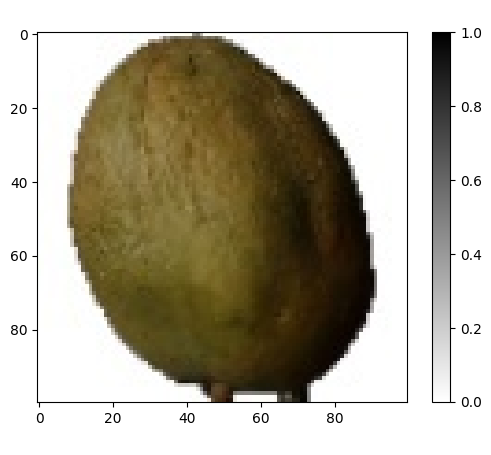

1/1 [==============================] - 0s 16ms/step

Expected: Peach
Guess:Peach


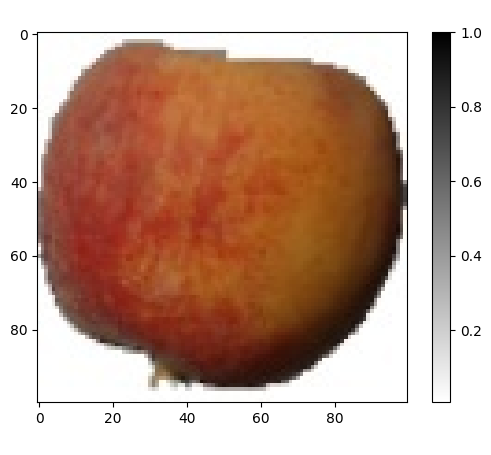

1/1 [==============================] - 0s 24ms/step

Expected: Watermelon
Guess:Watermelon


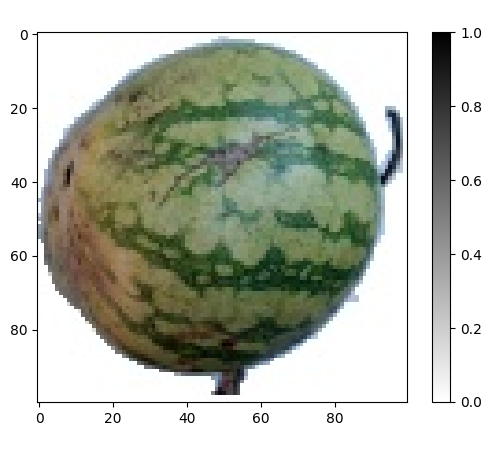

1/1 [==============================] - 0s 18ms/step

Expected: Pepper Red
Guess:Pepper Red


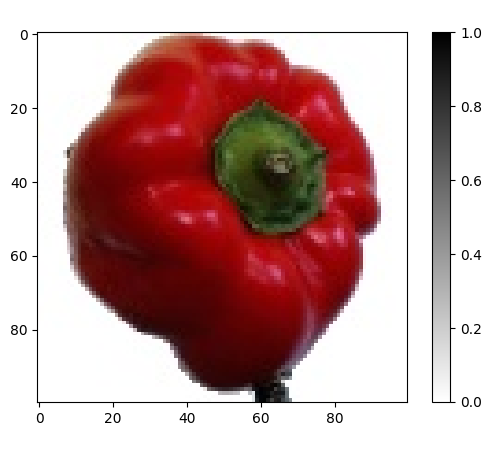

1/1 [==============================] - 0s 19ms/step

Expected: Watermelon
Guess:Watermelon


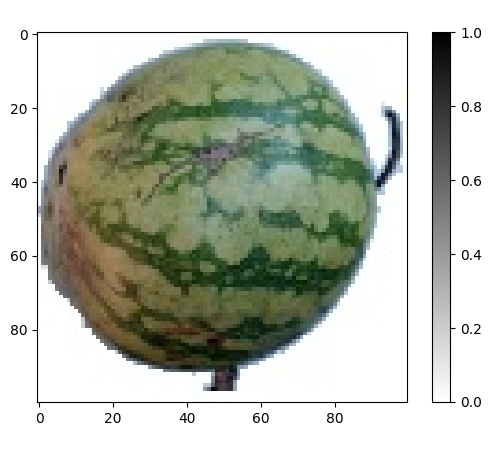

1/1 [==============================] - 0s 20ms/step

Expected: Papaya
Guess:Papaya


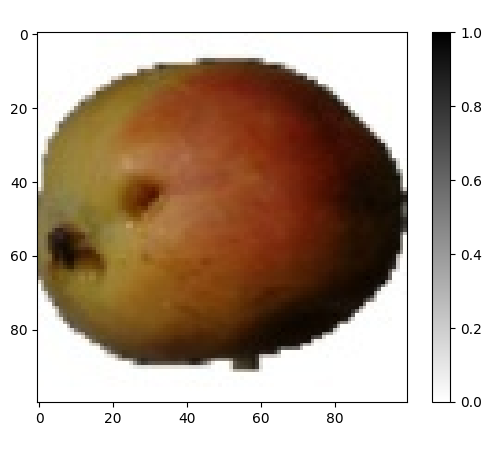

1/1 [==============================] - 0s 24ms/step

Expected: Pepper Green
Guess:Pepper Green


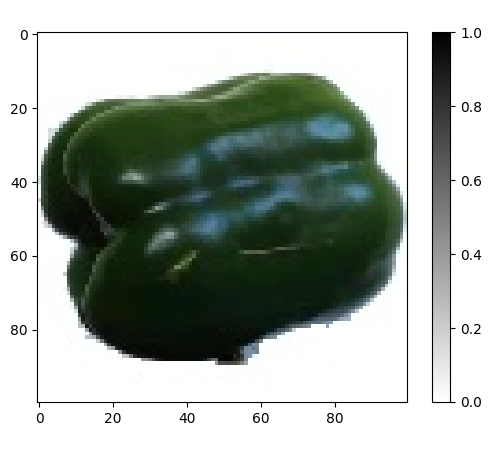

1/1 [==============================] - 0s 24ms/step

Expected: Passion Fruit
Guess:Passion Fruit


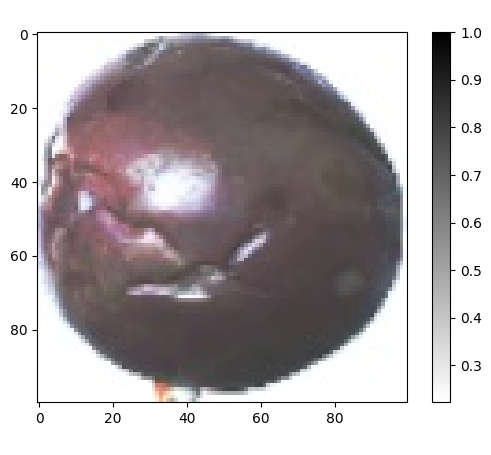

1/1 [==============================] - 0s 27ms/step

Expected: Pepper Green
Guess:Pepper Green


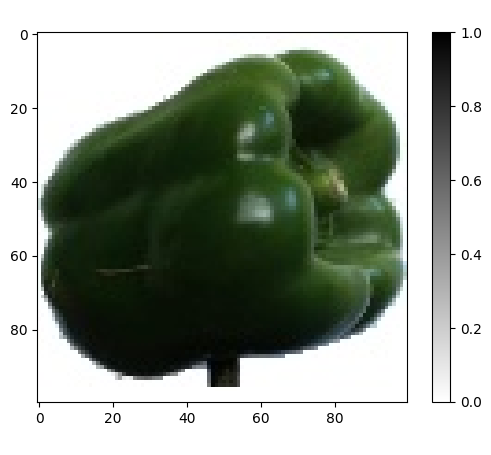

1/1 [==============================] - 0s 30ms/step

Expected: Blueberry
Guess:Blueberry


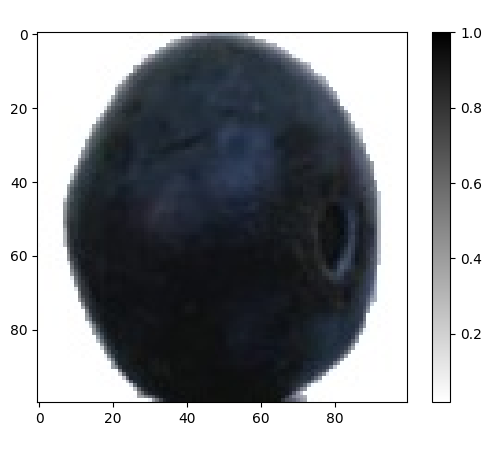

In [ ]:
import random

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label, class_names):
    prediction = model.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_numbers():
    return random.sample(range(len(test_ds)), 15)

nums = get_numbers()

images, labels = list(val_ds.take(1))[0]
for num in nums:
    image, label = images[num], labels[num]
    predict(model, image, label, class_names)


#### Modelo 2

In [ ]:
predictions = model2.predict(test_ds)

39/39 [==============================] - 1s 12ms/step


In [ ]:
predictions[0]

array([1.7172630e-08, 1.5644851e-04, 1.4415136e-13, 7.2162933e-08,
       1.9441538e-04, 9.9027471e-05, 2.0507366e-06, 1.1993916e-08,
       3.1404451e-10, 5.1236464e-14, 1.4350704e-08, 9.3699800e-06,
       8.6693772e-06, 1.1248427e-05, 1.3594432e-09, 2.6086593e-05,
       2.7349091e-04, 3.4236065e-05, 1.2112124e-12, 2.2874065e-06,
       1.2269917e-04, 4.3407553e-08, 3.1400953e-06, 3.7472649e-04,
       3.5785162e-12, 3.8369503e-03, 6.2834101e-06, 3.6132120e-09,
       7.4960740e-04, 8.1376558e-05, 4.9701835e-06, 2.4509282e-13,
       9.9400276e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

32

Pick a number: 5
1/1 [==============================] - 0s 61ms/step

Expected: Lemon
Guess:Lemon


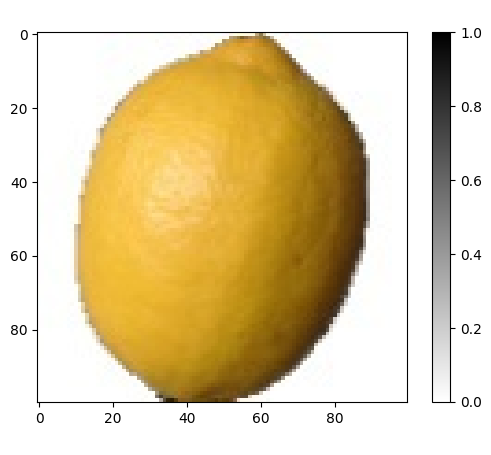

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model2, image, correct_label, class_names):
    prediction = model2.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < len(test_ds):
                return num
        print("Try again...")

num = get_number()

images, labels = list(val_ds.take(1))[0]
image, label = images[num], labels[num]
predict(model2, image, label, class_names)


1/1 [==============================] - 0s 18ms/step

Expected: Passion Fruit
Guess:Passion Fruit


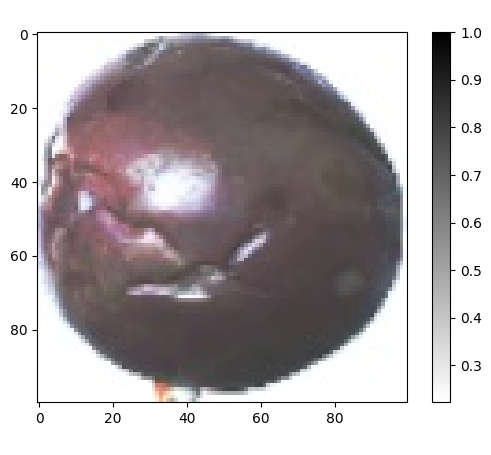

1/1 [==============================] - 0s 17ms/step

Expected: Grape Blue
Guess:Grape Blue


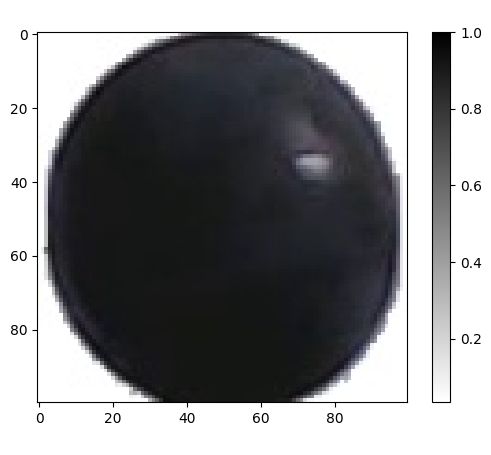

1/1 [==============================] - 0s 18ms/step

Expected: Grape Blue
Guess:Grape Blue


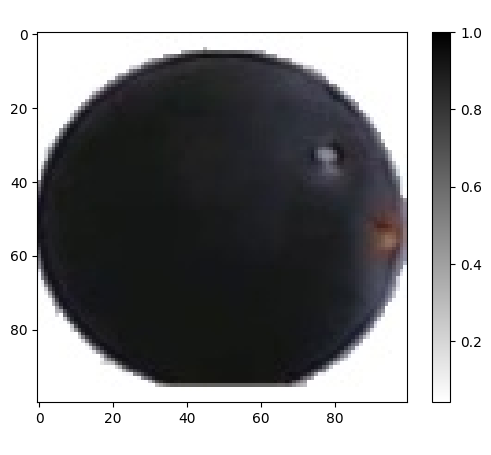

1/1 [==============================] - 0s 22ms/step

Expected: Cucumber Ripe
Guess:Cucumber Ripe


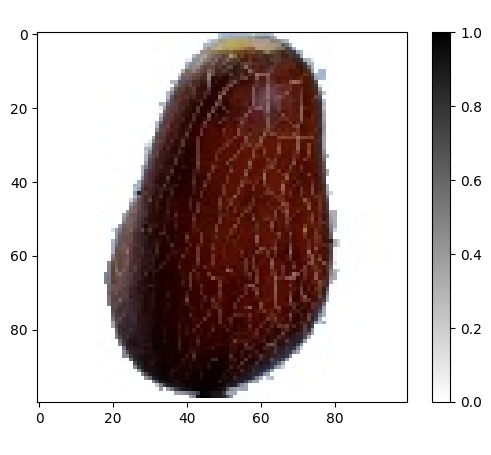

1/1 [==============================] - 0s 19ms/step

Expected: Orange
Guess:Orange


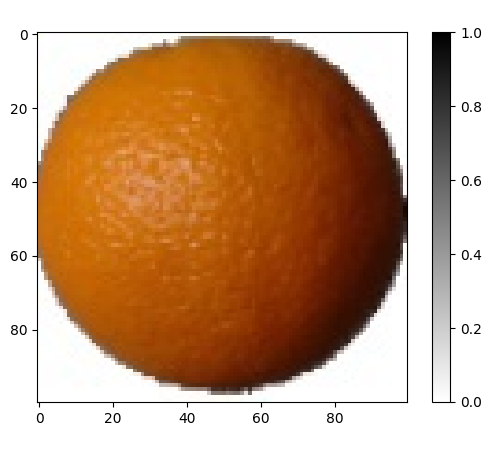

1/1 [==============================] - 0s 17ms/step

Expected: Banana
Guess:Banana


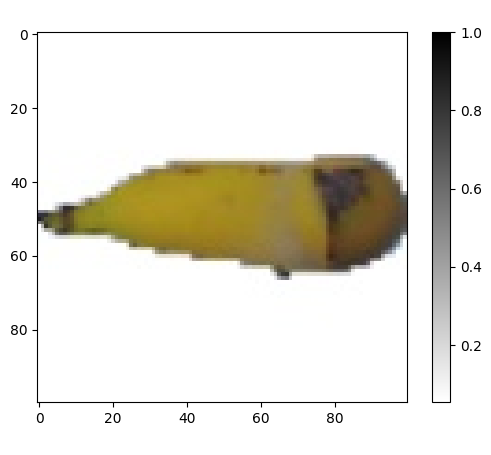

1/1 [==============================] - 0s 18ms/step

Expected: Peach
Guess:Peach


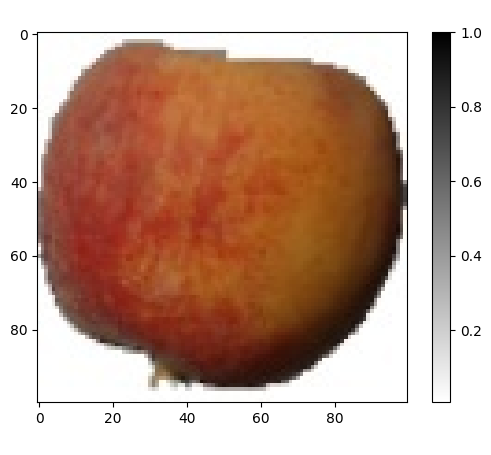

1/1 [==============================] - 0s 17ms/step

Expected: Limes
Guess:Limes


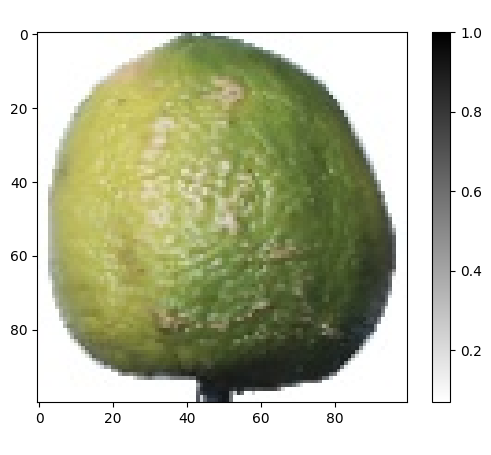

1/1 [==============================] - 0s 18ms/step

Expected: Lemon
Guess:Lemon


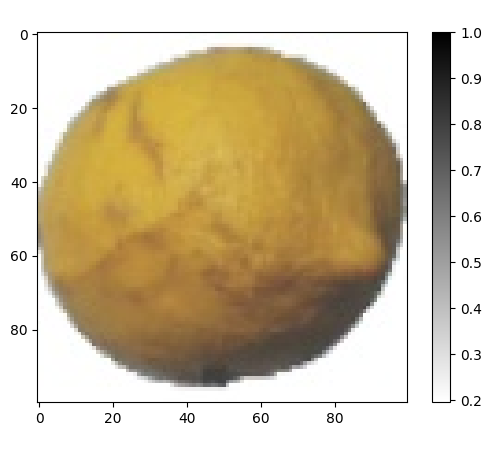

1/1 [==============================] - 0s 22ms/step

Expected: Onion White
Guess:Onion White


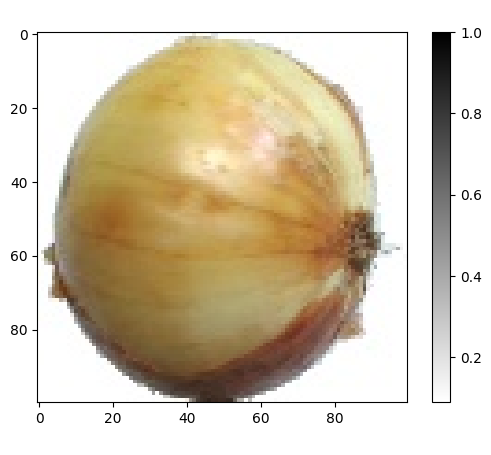

1/1 [==============================] - 0s 19ms/step

Expected: Mango
Guess:Mango


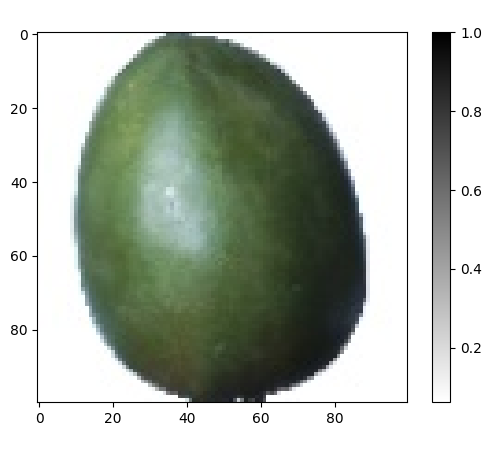

1/1 [==============================] - 0s 17ms/step

Expected: Pear
Guess:Pear


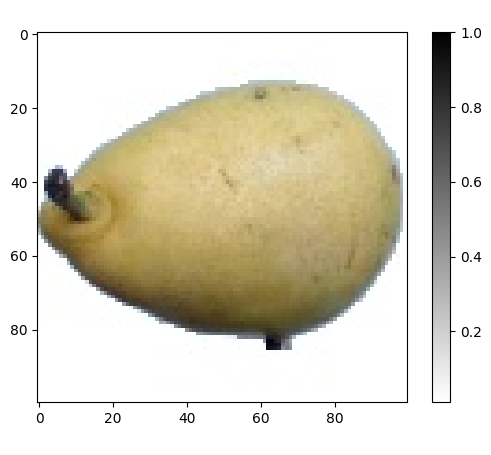

1/1 [==============================] - 0s 24ms/step

Expected: Watermelon
Guess:Watermelon


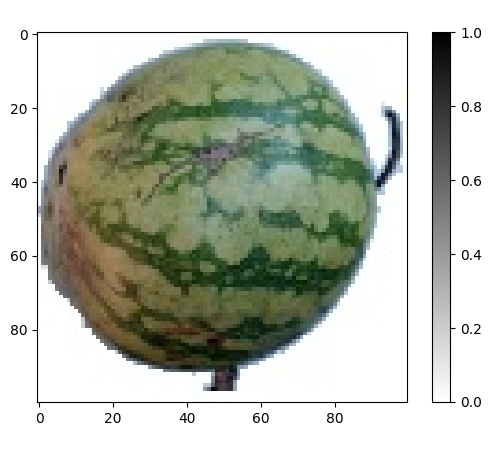

1/1 [==============================] - 0s 24ms/step

Expected: Lemon
Guess:Lemon


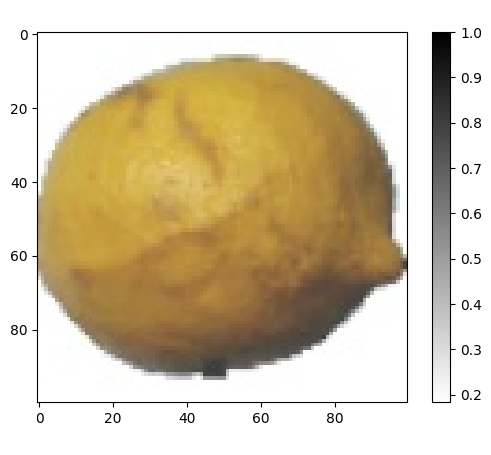

1/1 [==============================] - 0s 28ms/step

Expected: Pepper Green
Guess:Pepper Green


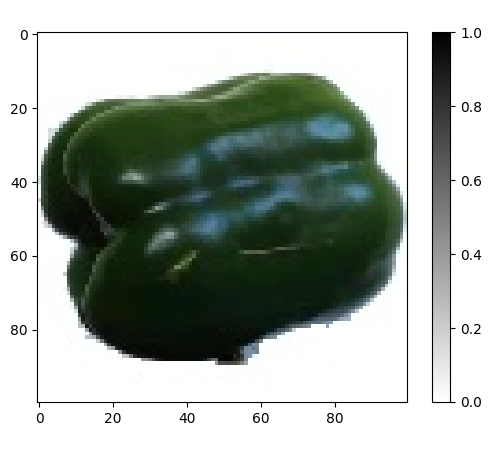

In [ ]:
import random

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model2, image, correct_label, class_names):
    prediction = model2.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_numbers():
    return random.sample(range(len(test_ds)), 15)

nums = get_numbers()

images, labels = list(val_ds.take(1))[0]
for num in nums:
    image, label = images[num], labels[num]
    predict(model2, image, label, class_names)


#### Modelo 3

In [ ]:
predictions = model3.predict(test_ds)

39/39 [==============================] - 1s 19ms/step


In [ ]:
predictions[0]

array([1.3952331e-15, 4.6893978e-10, 9.5192727e-31, 2.5701895e-11,
       6.3094866e-08, 2.2999460e-08, 3.4369709e-08, 2.8708472e-16,
       1.5231649e-18, 3.9116966e-24, 1.1458944e-14, 1.3916067e-09,
       1.0091784e-11, 4.7255984e-11, 1.9170419e-16, 2.9132107e-08,
       5.5765599e-07, 8.5083969e-13, 7.1290260e-26, 3.6442630e-11,
       8.8892316e-09, 5.8754862e-18, 1.2239772e-10, 8.3838522e-06,
       1.9995881e-20, 1.7423064e-05, 1.8680767e-10, 3.7443005e-18,
       1.6685439e-08, 3.9475081e-09, 3.1865285e-11, 2.2444362e-27,
       9.9997354e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

32

Pick a number: 10
1/1 [==============================] - 0s 48ms/step

Expected: Papaya
Guess:Papaya


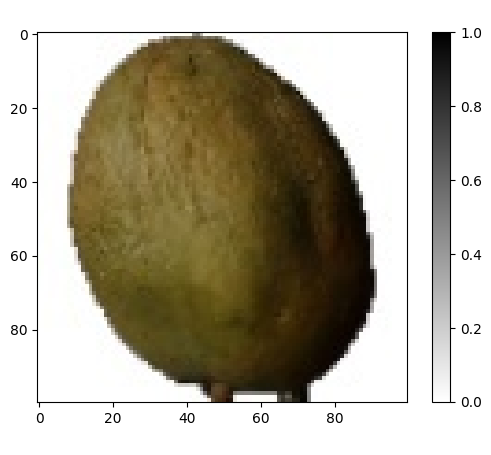

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model3, image, correct_label, class_names):
    prediction = model3.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < len(test_ds):
                return num
        print("Try again...")

num = get_number()

images, labels = list(val_ds.take(1))[0]
image, label = images[num], labels[num]
predict(model3, image, label, class_names)


1/1 [==============================] - 0s 19ms/step

Expected: Grape Blue
Guess:Grape Blue


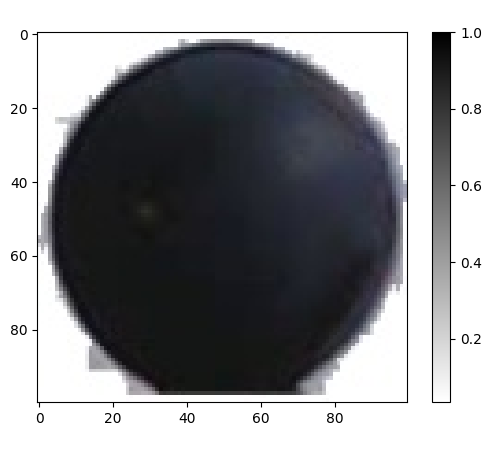

1/1 [==============================] - 0s 20ms/step

Expected: Pear
Guess:Pear


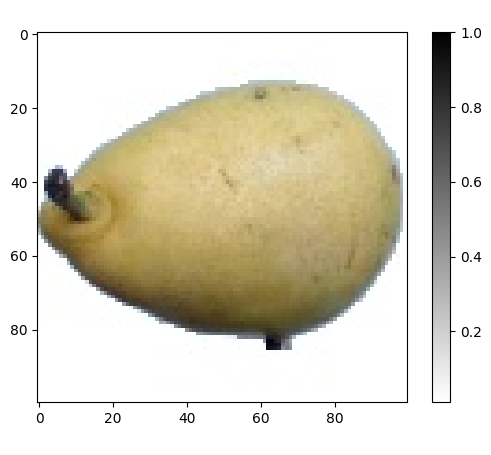

1/1 [==============================] - 0s 18ms/step

Expected: Orange
Guess:Orange


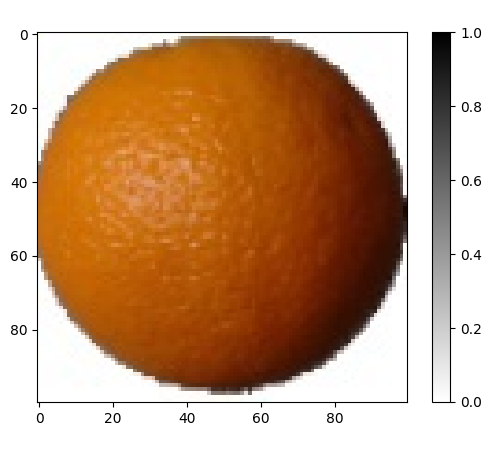

1/1 [==============================] - 0s 20ms/step

Expected: Tomato
Guess:Tomato


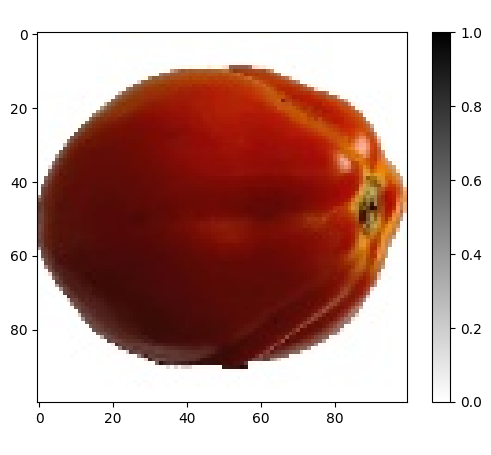

1/1 [==============================] - 0s 18ms/step

Expected: Lemon
Guess:Lemon


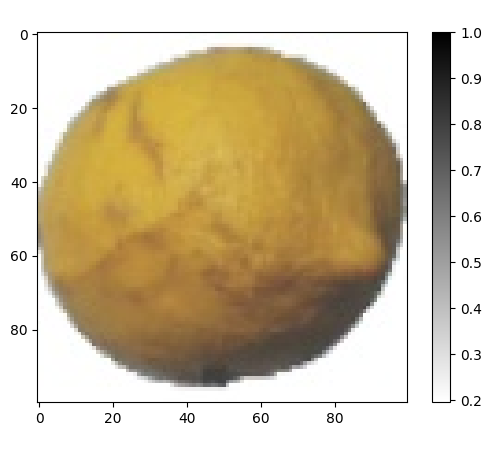

1/1 [==============================] - 0s 19ms/step

Expected: Blueberry
Guess:Blueberry


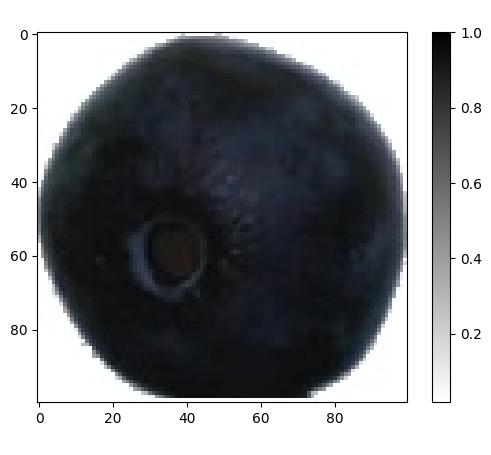

1/1 [==============================] - 0s 18ms/step

Expected: Watermelon
Guess:Watermelon


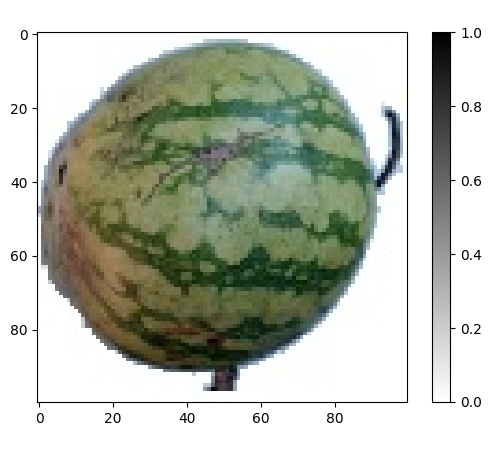

1/1 [==============================] - 0s 18ms/step

Expected: Papaya
Guess:Papaya


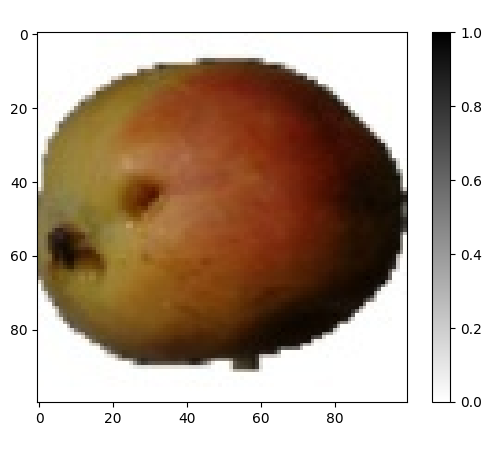

1/1 [==============================] - 0s 18ms/step

Expected: Pepper Green
Guess:Pepper Green


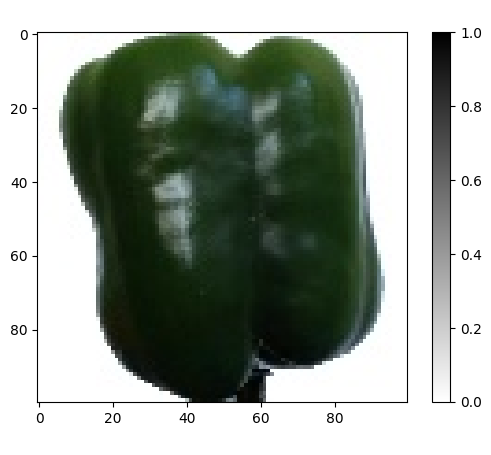

1/1 [==============================] - 0s 17ms/step

Expected: Papaya
Guess:Papaya


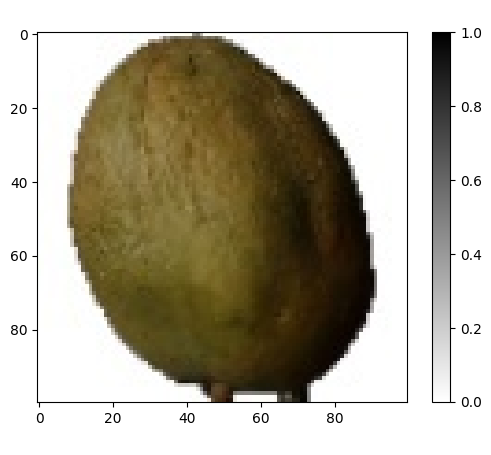

1/1 [==============================] - 0s 17ms/step

Expected: Grape Blue
Guess:Grape Blue


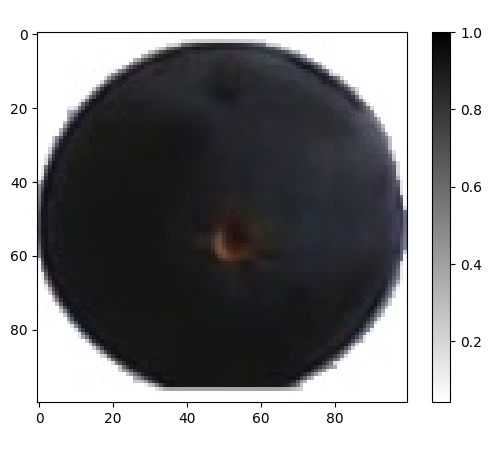

1/1 [==============================] - 0s 18ms/step

Expected: Onion White
Guess:Onion White


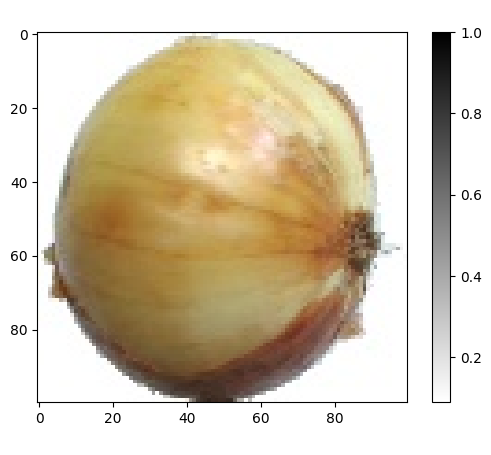

1/1 [==============================] - 0s 19ms/step

Expected: Blueberry
Guess:Blueberry


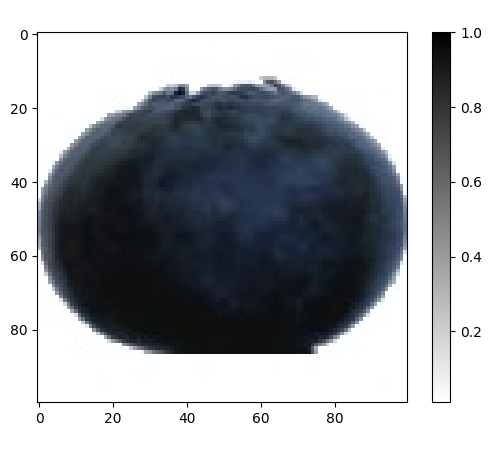

1/1 [==============================] - 0s 17ms/step

Expected: Peach
Guess:Peach


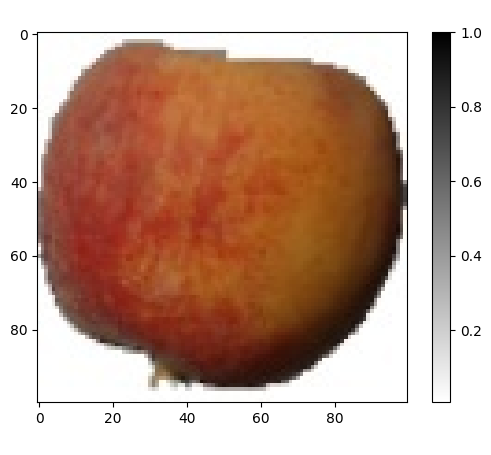

1/1 [==============================] - 0s 17ms/step

Expected: Banana
Guess:Banana


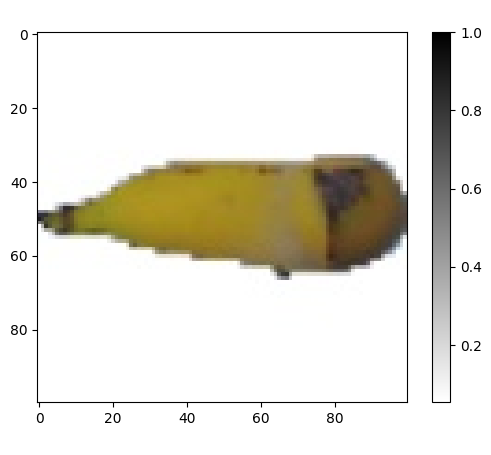

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model3, image, correct_label, class_names):
    prediction = model3.predict(np.array([image]))
    correct_label = np.argmax(correct_label)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print(f"\nExpected: {label}\nGuess:{guess}")
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}")
    plt.xlabel(f"Guess: {guess}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_numbers():
    return random.sample(range(len(test_ds)), 15)

nums = get_numbers()

images, labels = list(val_ds.take(1))[0]
for num in nums:
    image, label = images[num], labels[num]
    predict(model3, image, label, class_names)

## Conclusão

## Referências

* https://mariofilho.com/precisao-recall-e-f1-score-em-machine-learning/#qual-a-f%C3%B3rmula-da-precis%C3%A3o-na-matriz-de-confus%C3%A3o

* https://mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/

* https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509